# Cross-species muscle

Matplotlib Backend: module://ipykernel.pylab.backend_inline
-----
anndata     0.7.5
scanpy      1.7.0rc1
sinfo       0.3.1
-----
anndata             0.7.5
autoreload          NA
backcall            0.1.0
cairo               1.18.2
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.0
decorator           4.4.1
get_version         2.1
h5py                2.10.0
igraph              0.7.1
importlib_metadata  0.19
ipykernel           5.1.3
ipython_genutils    0.2.0
jedi                0.15.1
joblib              0.14.1
kiwisolver          1.1.0
legacy_api_wrap     0.0.0
leidenalg           0.7.0
llvmlite            0.30.0
louvain             0.6.1
matplotlib          3.1.2
more_itertools      NA
mpl_toolkits        NA
natsort             6.2.0
numba               0.46.0
numexpr             2.7.0
numpy               1.17.3
packaging           20.8
pandas              1.1.4
parso               0.5.1
pexpect             4.7.0
pickleshare         0

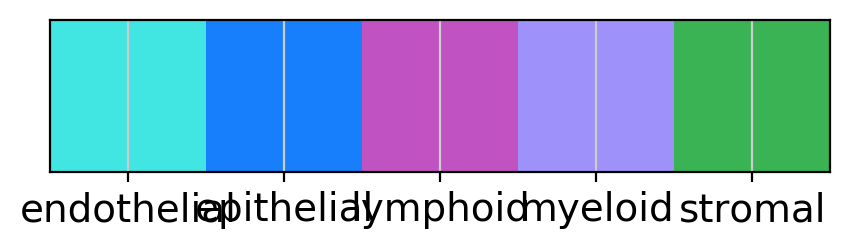

In [1]:
%load_ext autoreload
%autoreload 2

from collections import defaultdict

import glob
import os
import sys

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scanpy as sc
import yaml


sys.path.append('/home/olga/code/xspecies--olgabot/refactor-bladder-blood-lung-muscle/xspecies/')

# Handwritten modules
import preprocess
from plot_utils import save_figures

## Constants

In [2]:
tissue = 'muscle'


umap_plot_kws = dict(color=['species', 'compartment_group', 'broad_group'], ncols=2)
celltype_col = 'narrow_group'
species_col = 'species'
compartment_col = 'compartment_group'

object_dir = '/home/olga/data_lg/data_sm_copy/tabula-microcebus/data-objects/cross-species'

output_file = os.path.join(object_dir, f'concatenated__human-lemur-mouse_10x__one2one_orthologs__{tissue}__august2021__preprocessed.h5ad')

min_cells_per_celltype = 20

## Set scanpy savefig options

In [3]:

xspecies_figure_folder = '/home/olga/googledrive/TabulaMicrocebus/analysis/cross-species--bladder-blood-lung-muscle'

figure_folder = os.path.join(xspecies_figure_folder, tissue, 'preprocess')

sc._settings.ScanpyConfig(autosave=True, figdir=figure_folder, autoshow=True)
# Then, "ALWAYS use sans-serif fonts"
plt.rcParams['font.family'] = "Arial"

sc.settings.autosave = True
sc.settings.autoshow = True
sc.settings.figdir = figure_folder

# Load data

## Unprocessed data

In [4]:
object_dir = '/home/olga/data_lg/data_sm_copy/tabula-microcebus/data-objects/cross-species' 
h5ad = os.path.join(object_dir, f'concatenated__human-lemur-mouse_10x__one2one_orthologs__{tissue}__august2021.h5ad')
adata = sc.read(h5ad, cache=True)

adata

AnnData object with n_obs × n_vars = 35900 × 13302
    obs: 'age', 'cell_id', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'n_genes', 'sex', 'subtissue', 'tissue', 'species', 'species_latin', 'channel', 'sequencing_run', 'cell_barcode', 'n_counts', 'individual', 'narrow_group', 'broad_group', 'compartment_group', 'cell', 'method', 'mouse.id', 'tissue_free_annotation', 'louvain', 'leiden', 'TMS_muscle_ADM_free_annotation', 'TMS_muscle_CE_compartment', 'TMS_muscle_CE_free_annotation', 'batch', 'compartment', 'channel_10x', 'species_batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'mouse_lemur__gene_name', 'mouse__gene_name', 'name-lemur', 'highly_variable-lemur', 'n_cells-mouse_tabula_muris_senis', 'means-1-mouse_tabula_muris_senis', 'dispersions-1-mouse_tabula_muris_senis', 'dispersions_norm-1-mou

In [5]:
adata.obs.query('species == "Mouse Lemur"').tail()

age cell_id  \
L2_Limb_muscle_10X_TTTGTCAAGCCCAGCT-lemur  nan     nan   
L2_Limb_muscle_10X_TTTGTCACAAGTAGTA-lemur  nan     nan   
L2_Limb_muscle_10X_TTTGTCACAATCTGCA-lemur  nan     nan   
L2_Limb_muscle_10X_TTTGTCACATACGCTA-lemur  nan     nan   
L2_Limb_muscle_10X_TTTGTCATCGCATGAT-lemur  nan     nan   

                                                       cell_ontology_class  \
L2_Limb_muscle_10X_TTTGTCAAGCCCAGCT-lemur                   reticular cell   
L2_Limb_muscle_10X_TTTGTCACAAGTAGTA-lemur            mesenchymal stem cell   
L2_Limb_muscle_10X_TTTGTCACAATCTGCA-lemur  CD4-positive, alpha-beta T cell   
L2_Limb_muscle_10X_TTTGTCACATACGCTA-lemur                    pericyte cell   
L2_Limb_muscle_10X_TTTGTCATCGCATGAT-lemur                    pericyte cell   

                                          cell_ontology_id  \
L2_Limb_muscle_10X_TTTGTCAAGCCCAGCT-lemur              nan   
L2_Limb_muscle_10X_TTTGTCACAAGTAGTA-lemur              nan   
L2_Limb_muscle_10X_TTTGTCACAATCTGCA-lemur              nan   
L2_Limb_muscle_10X_TTTGTCACATACGCTA-lemur              nan   
L2_Limb_muscle_10X_TTTGTCATCGCATGAT-lemur              nan   

                                                           free_annotation  \
L2_Limb_muscle_10X_TTTGTCAAGCCCAGCT-lemur                   reticular cell   
L2_Limb_muscle_10X_TTTGTCACAAGTAGTA-lemur  fibroadipogenic progenitor cell   
L2_Limb_muscle_10X_TTTGTCACAATCTGCA-lemur  T cell (CD4+ CD8- CCL5- CLDN1+)   
L2_Limb_muscle_10X_TTTGTCACATACGCTA-lemur                         pericyte   
L2_Limb_muscle_10X_TTTGTCATCGCATGAT-lemur                         pericyte   

                                          n_genes  sex subtissue       tissue  \
L2_Limb_muscle_10X_TTTGTCAAGCCCAGCT-lemur    1311  nan       nan  Limb_muscle   
L2_Limb_muscle_10X_TTTGTCACAAGTAGTA-lemur     905  nan       nan  Limb_muscle   
L2_Limb_muscle_10X_TTTGTCACAATCTGCA-lemur     816  nan       nan  Limb_muscle   
L2_Limb_muscle_10X_TTTGTCACATACGCTA-lemur     856  nan       nan  Limb_muscle   
L2_Limb_muscle_10X_TTTGTCATCGCATGAT-lemur     800  nan       nan  Limb_muscle   

                                               species  ...  \
L2_Limb_muscle_10X_TTTGTCAAGCCCAGCT-lemur  Mouse Lemur  ...   
L2_Limb_muscle_10X_TTTGTCACAAGTAGTA-lemur  Mouse Lemur  ...   
L2_Limb_muscle_10X_TTTGTCACAATCTGCA-lemur  Mouse Lemur  ...   
L2_Limb_muscle_10X_TTTGTCACATACGCTA-lemur  Mouse Lemur  ...   
L2_Limb_muscle_10X_TTTGTCATCGCATGAT-lemur  Mouse Lemur  ...   

                                                  channel_10x species_batch  \
L2_Limb_muscle_10X_TTTGTCAAGCCCAGCT-lemur  L2_Limb_muscle_10X         lemur   
L2_Limb_muscle_10X_TTTGTCACAAGTAGTA-lemur  L2_Limb_muscle_10X         lemur   
L2_Limb_muscle_10X_TTTGTCACAATCTGCA-lemur  L2_Limb_muscle_10X         lemur   
L2_Limb_muscle_10X_TTTGTCACATACGCTA-lemur  L2_Limb_muscle_10X         lemur   
L2_Limb_muscle_10X_TTTGTCATCGCATGAT-lemur  L2_Limb_muscle_10X         lemur   

                                          n_genes_by_counts  \
L2_Limb_muscle_10X_TTTGTCAAGCCCAGCT-lemur               972   
L2_Limb_muscle_10X_TTTGTCACAAGTAGTA-lemur               689   
L2_Limb_muscle_10X_TTTGTCACAATCTGCA-lemur               600   
L2_Limb_muscle_10X_TTTGTCACATACGCTA-lemur               647   
L2_Limb_muscle_10X_TTTGTCATCGCATGAT-lemur               620   

                                          log1p_n_genes_by_counts  \
L2_Limb_muscle_10X_TTTGTCAAGCCCAGCT-lemur                6.880384   
L2_Limb_muscle_10X_TTTGTCACAAGTAGTA-lemur                6.536692   
L2_Limb_muscle_10X_TTTGTCACAATCTGCA-lemur                6.398595   
L2_Limb_muscle_10X_TTTGTCACATACGCTA-lemur                6.473891   
L2_Limb_muscle_10X_TTTGTCATCGCATGAT-lemur                6.431331   

                                          total_counts log1p_total_counts  \
L2_Limb_muscle_10X_TTTGTCAAGCCCAGCT-lemur       2605.0           7.865572   
L2_Limb_muscle_10X_TTTGTCACAAGTAGTA-lemur       1417.0           7.257003   
L2_Limb_muscle_10

In [6]:
adata[adata.obs.species == "Mouse Lemur"][:5, :5].to_df()

XKR4  SOX17  MRPL15  LYPLA1  TCEA1
L2_Limb_muscle_10X_AAACCTGAGTCCGGTC-lemur   0.0    0.0     0.0     0.0    1.0
L2_Limb_muscle_10X_AAACCTGAGTGGTAAT-lemur   0.0    1.0     0.0     0.0    0.0
L2_Limb_muscle_10X_AAACCTGCACCCAGTG-lemur   0.0    0.0     0.0     0.0    0.0
L2_Limb_muscle_10X_AAACCTGCATTAGGCT-lemur   0.0    0.0     0.0     0.0    0.0
L2_Limb_muscle_10X_AAACCTGGTCATATCG-lemur   0.0    0.0     0.0     0.0    1.0

### Show number of cells in original `adata`

In [7]:
original_cell_numbers = adata.obs.groupby(["narrow_group", "species"]).size().unstack()
original_cell_numbers

species                                             Human  Mouse  Mouse Lemur
narrow_group                                                                 
B cell                                                  4    824          201
B cell (PF)                                             0      6           12
Schwann cell (NGFR+)                                    0     52            0
T cell                                                  0    182            0
T cell (CD4+)                                          51     97          781
T cell (CD8+)                                          59    230          290
T cell (PF CD4+)                                        0      6            0
T cell (PF CD8+)                                        0      5            0
T cell (regulatory CD4+)                                0     54            0
adipocyte                                               0      0           24
artery cell                                           249    763            3
artery cell_capillary cell (RBP7+)                      0    286            0
basophil                                               14      6            5
capillary cell                                        948   2499          431
capillary cell (CXCL10+)                                0      0            8
classical monocyte                                     89    254            0
conventional dendritic cell                             8    107            0
conventional dendritic cell (PF)                        0     15            0
doublet                                               394    608          157
erythroid lineage cell                                 10     13           10
fast muscle cell                                      152    147           45
fibroadipogenic progenitor cell                      6168   6483          542
fibroadipogenic progenitor cell_tendon cell (SF...      0    281            0
innate lymphoid cell                                    0     24            0
lymphatic cell                                         21    265           20
lymphoid cell                                           1      0            0
macrophage                                            657    793          148
mature dendritic cell                                   0     26            0
myelinating Schwann cell                                0     28            0
nan                                                    21      0           17
natural killer T cell                                   0      0            8
natural killer cell                                    44     14            0
natural killer cell_T cell (PF)                         0      0           13
neutrophil                                              0    106           52
neutrophil (PF)                                         0     27            0
neutrophil_monocyte                                     0     14            0
non-classical monocyte                                 11     50            0
pericyte                                              354    160          104
pericyte_vascular associated smooth muscle cell         0    187            0
plasma cell                                             5     53           31
plasma cell (PF)                                        0      0            2
plasmacytoid dendritic cell                             0     10            0
reticular cell                                          0      0           19
skeletal muscle satellite stem cell                  2158   1176           86
skeletal muscle satellite stem cell (MYOG+)             0     10            0
skeletal muscle satellite stem cell (PF)                7      0            0
slow muscle cell                                       88      2           18
tendon cell                                            89   1944           51
tendon cell_chondrocyte (COL2A1+)                       0      2            0
tendon cell_osteoblast

### Show number of nonzero cells

In [9]:
original_cell_numbers[(original_cell_numbers > 0).all(axis=1)]

species                              Human  Mouse  Mouse Lemur
narrow_group                                                  
B cell                                   4    824          201
T cell (CD4+)                           51     97          781
T cell (CD8+)                           59    230          290
artery cell                            249    763            3
basophil                                14      6            5
capillary cell                         948   2499          431
doublet                                394    608          157
erythroid lineage cell                  10     13           10
fast muscle cell                       152    147           45
fibroadipogenic progenitor cell       6168   6483          542
lymphatic cell                          21    265           20
macrophage                             657    793          148
pericyte                               354    160          104
plasma cell                              5     53           31
skeletal muscle satellite stem cell   2158   1176           86
slow muscle cell                        88      2           18
tendon cell                             89   1944           51
vein cell                             1233    777           47

In [10]:
adata.obs.groupby(['broad_group', 'species']).size().unstack()


species                                             Human  Mouse  Mouse Lemur
broad_group                                                                  
B cell                                                  4    830          213
Schwann cell                                            0    170            0
T cell                                                110    574         1071
adipocyte                                               0      0           24
artery cell                                           249    763            3
artery cell_capillary cell (RBP7+)                      0    286            0
basophil                                               14      6            5
capillary cell                                        948   2499          439
conventional dendritic cell                             8    122            0
dendritic cell                                          0     26            0
doublet                                               394    608          157
erythroid lineage cell                                 10     13           10
fast muscle cell                                      152    147           45
fibroadipogenic progenitor cell                      6168   6483          542
fibroadipogenic progenitor cell_tendon cell (SF...      0    281            0
innate lymphoid cell                                    0     24            0
lymphatic cell                                         21    265           20
lymphoid cell                                           1      0            0
macrophage                                            657    793          148
monocyte                                              100    304            0
nan                                                    21      0           17
natural killer T cell                                   0      0            8
natural killer cell                                    44     14            0
natural killer cell_T cell (PF)                         0      0           13
neutrophil                                              0    133           52
neutrophil_monocyte                                     0     14            0
pericyte                                              354    160          104
pericyte_vascular associated smooth muscle cell         0    187            0
plasma cell                                             5     53           33
plasmacytoid dendritic cell                             0     10            0
reticular cell                                          0      0           19
skeletal muscle satellite stem cell                  2165   1186           86
slow muscle cell                                       88      2           18
tendon cell                                            89   1944           51
tendon cell_chondrocyte (COL2A1+)                       0      2            0
tendon cell_osteoblast (BGLAP+)                         0      7            0
unknown_endothelial (COL13A1+)                          0     50            0
unknown_epithelial_stromal (KRT5+)                      0      5            0
unknown_lymphoid (FCER1G+)                              0      5            0
unknown_myeloid (CD209A+)                               0    227            0
unknown_myeloid (PF CD209A+)                            0     16            0
unknown_stromal (ADGRL3+)                              98      0            0
unknown_stromal (CLDN1+)                               19    152            0
unknown_stromal (CLDN1- COL9A2+)                        0    185            0
vascular associated smooth muscle cell                262    237            0
vein cell                                            1234    777           47

## Remove color palettes

In [11]:
preprocess.remove_color_palettes(adata)


## Ignore Doublets and nan

Mouse macrophages are a mix of neutrophils and macrophages, so ignore

In [12]:
celltypes_to_ignore = 'doublet', 'nan'

In [13]:
adata = adata[~adata.obs.narrow_group.isin(celltypes_to_ignore)]
adata

View of AnnData object with n_obs × n_vars = 34703 × 13302
    obs: 'age', 'cell_id', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'n_genes', 'sex', 'subtissue', 'tissue', 'species', 'species_latin', 'channel', 'sequencing_run', 'cell_barcode', 'n_counts', 'individual', 'narrow_group', 'broad_group', 'compartment_group', 'cell', 'method', 'mouse.id', 'tissue_free_annotation', 'louvain', 'leiden', 'TMS_muscle_ADM_free_annotation', 'TMS_muscle_CE_compartment', 'TMS_muscle_CE_free_annotation', 'batch', 'compartment', 'channel_10x', 'species_batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'mouse_lemur__gene_name', 'mouse__gene_name', 'name-lemur', 'highly_variable-lemur', 'n_cells-mouse_tabula_muris_senis', 'means-1-mouse_tabula_muris_senis', 'dispersions-1-mouse_tabula_muris_senis', 'dispersions_no

### Delete all existing color palettes because they mess plotting up

In [14]:
for key in list(adata.uns.keys()):
    if key.endswith('colors'):
        del adata.uns[key]

In [15]:
adata.obs.query('species == "Mouse Lemur"')

age cell_id  \
L2_Limb_muscle_10X_AAACCTGAGTCCGGTC-lemur  nan     nan   
L2_Limb_muscle_10X_AAACCTGCACCCAGTG-lemur  nan     nan   
L2_Limb_muscle_10X_AAACCTGCATTAGGCT-lemur  nan     nan   
L2_Limb_muscle_10X_AAACCTGGTCATATCG-lemur  nan     nan   
L2_Limb_muscle_10X_AAACCTGTCATGTAGC-lemur  nan     nan   
...                                        ...     ...   
L2_Limb_muscle_10X_TTTGTCAAGCCCAGCT-lemur  nan     nan   
L2_Limb_muscle_10X_TTTGTCACAAGTAGTA-lemur  nan     nan   
L2_Limb_muscle_10X_TTTGTCACAATCTGCA-lemur  nan     nan   
L2_Limb_muscle_10X_TTTGTCACATACGCTA-lemur  nan     nan   
L2_Limb_muscle_10X_TTTGTCATCGCATGAT-lemur  nan     nan   

                                                           cell_ontology_class  \
L2_Limb_muscle_10X_AAACCTGAGTCCGGTC-lemur                mesenchymal stem cell   
L2_Limb_muscle_10X_AAACCTGCACCCAGTG-lemur                mesenchymal stem cell   
L2_Limb_muscle_10X_AAACCTGCATTAGGCT-lemur                mesenchymal stem cell   
L2_Limb_muscle_10X_AAACCTGGTCATATCG-lemur      CD4-positive, alpha-beta T cell   
L2_Limb_muscle_10X_AAACCTGTCATGTAGC-lemur  skeletal muscle satellite stem cell   
...                                                                        ...   
L2_Limb_muscle_10X_TTTGTCAAGCCCAGCT-lemur                       reticular cell   
L2_Limb_muscle_10X_TTTGTCACAAGTAGTA-lemur                mesenchymal stem cell   
L2_Limb_muscle_10X_TTTGTCACAATCTGCA-lemur      CD4-positive, alpha-beta T cell   
L2_Limb_muscle_10X_TTTGTCACATACGCTA-lemur                        pericyte cell   
L2_Limb_muscle_10X_TTTGTCATCGCATGAT-lemur                        pericyte cell   

                                          cell_ontology_id  \
L2_Limb_muscle_10X_AAACCTGAGTCCGGTC-lemur              nan   
L2_Limb_muscle_10X_AAACCTGCACCCAGTG-lemur              nan   
L2_Limb_muscle_10X_AAACCTGCATTAGGCT-lemur              nan   
L2_Limb_muscle_10X_AAACCTGGTCATATCG-lemur              nan   
L2_Limb_muscle_10X_AAACCTGTCATGTAGC-lemur              nan   
...                                                    ...   
L2_Limb_muscle_10X_TTTGTCAAGCCCAGCT-lemur              nan   
L2_Limb_muscle_10X_TTTGTCACAAGTAGTA-lemur              nan   
L2_Limb_muscle_10X_TTTGTCACAATCTGCA-lemur              nan   
L2_Limb_muscle_10X_TTTGTCACATACGCTA-lemur              nan   
L2_Limb_muscle_10X_TTTGTCATCGCATGAT-lemur              nan   

                                                               free_annotation  \
L2_Limb_muscle_10X_AAACCTGAGTCCGGTC-lemur      fibroadipogenic progenitor cell   
L2_Limb_muscle_10X_AAACCTGCACCCAGTG-lemur      fibroadipogenic progenitor cell   
L2_Limb_muscle_10X_AAACCTGCATTAGGCT-lemur      fibroadipogenic progenitor cell   
L2_Limb_muscle_10X_AAACCTGGTCATATCG-lemur             T cell (CD4+ CD8- CCL5-)   
L2_Limb_muscle_10X_AAACCTGTCATGTAGC-lemur  skeletal muscle satellite stem cell   
...                                                                        ...   
L2_Limb_muscle_10X_TTTGTCAAGCCCAGCT-lemur                       reticular cell   
L2_Limb_muscle_10X_TTTGTCACAAGTAGTA-lemur      fibroadipogenic progenitor cell   
L2_Limb_muscle_10X_TTTGTCACAATCTGCA-lemur      T cell (CD4+ CD8- CCL5- CLDN1+)   
L2_Limb_muscle_10X_TTTGTCACATACGCTA-lemur                             pericyte   
L2_Limb_muscle_10X_TTTGTCATCGCATGAT-lemur                             pericyte   

                                          n_genes  sex subtissue       tissue  \
L2_Limb_muscle_10X_AAACCTGAGTCCGGTC-lemur    1027  nan       nan  Limb_muscle   
L2_Limb_muscle_10X_AAACCTGCACCCAGTG-lemur     842  nan       nan  Limb_muscle   
L2_Limb_muscle_10X_AAACCTGCATTAGGCT-lemur    1246  nan       nan  Limb_muscle   
L2_Limb_muscle_10X_AAACCTGGTCATATCG-lemur     710  nan       nan  Limb_muscle   
L2_Limb_muscle_10X_AAACCTGTCATGTAGC-lemur     874  nan       nan  Limb_muscle   
...                                           ...  ...       ...          ...   
L2_Limb_muscle_10X_TTTGTCAAGCCCAGCT-lemur    1311  nan       nan

In [16]:
adata.uns

{}

In [17]:
preprocess.plot_constants.SPECIES_PALETTE

['#ff7f0e', '#2ca02c', '#1f77b4']

In [18]:
adata.uns['species_colors'] = preprocess.plot_constants.SPECIES_PALETTE

Trying to set attribute `.uns` of view, copying.


... storing 'compartment_broad' as categorical
... storing 'compartment_narrow' as categorical
... storing 'compartment_broad_narrow' as categorical
... storing 'compartment_species' as categorical
... storing 'compartment_narrow_species' as categorical
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


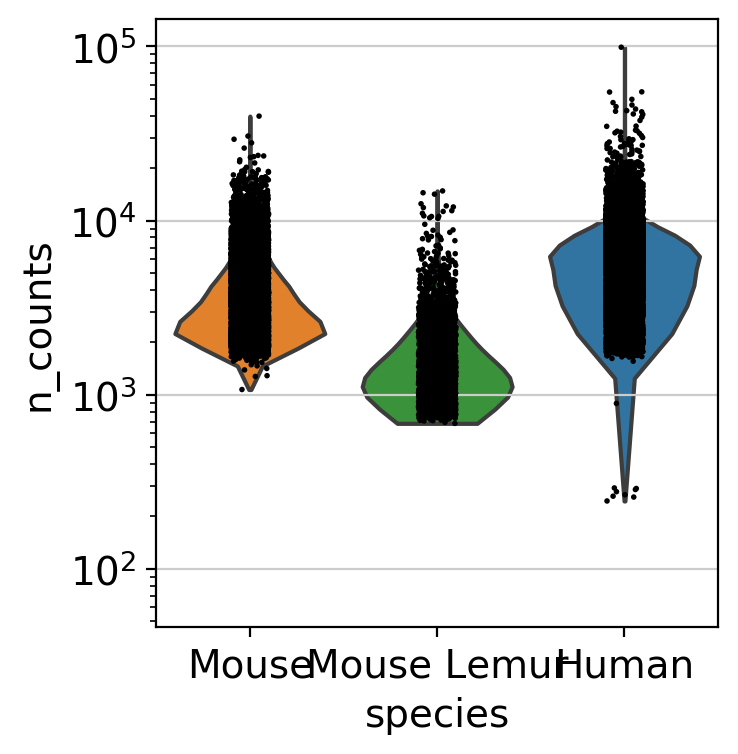

<Figure size 800x800 with 0 Axes>

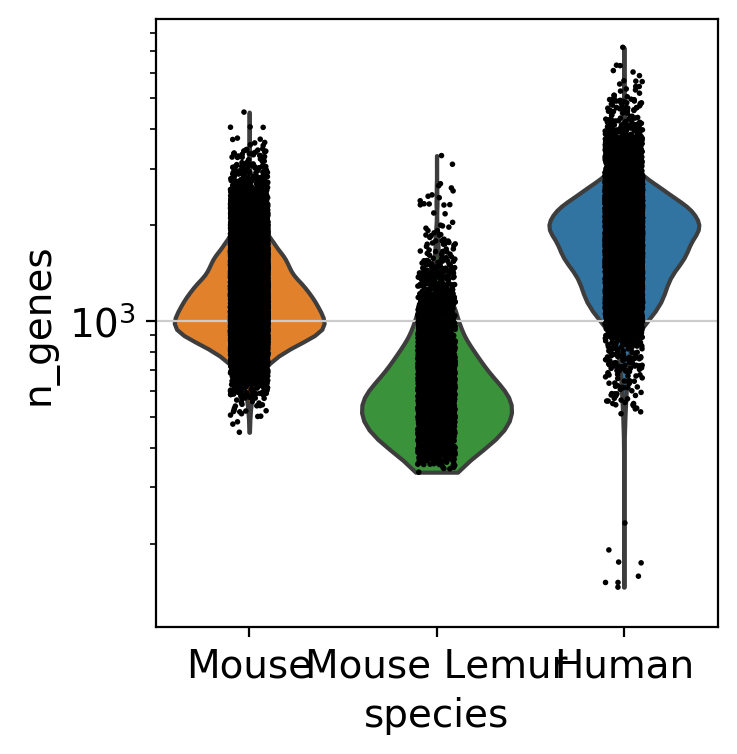

<Figure size 800x800 with 0 Axes>

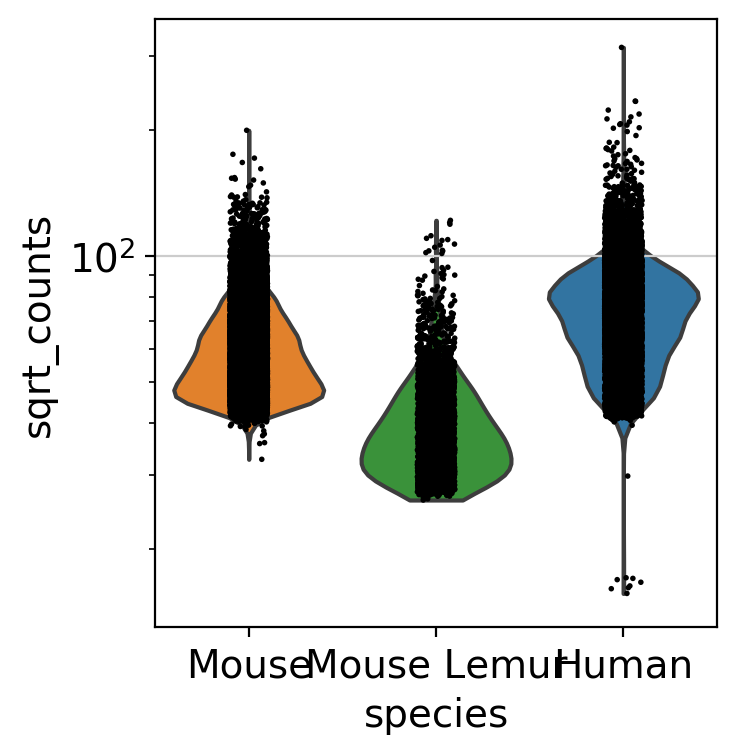

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


<Figure size 800x800 with 0 Axes>

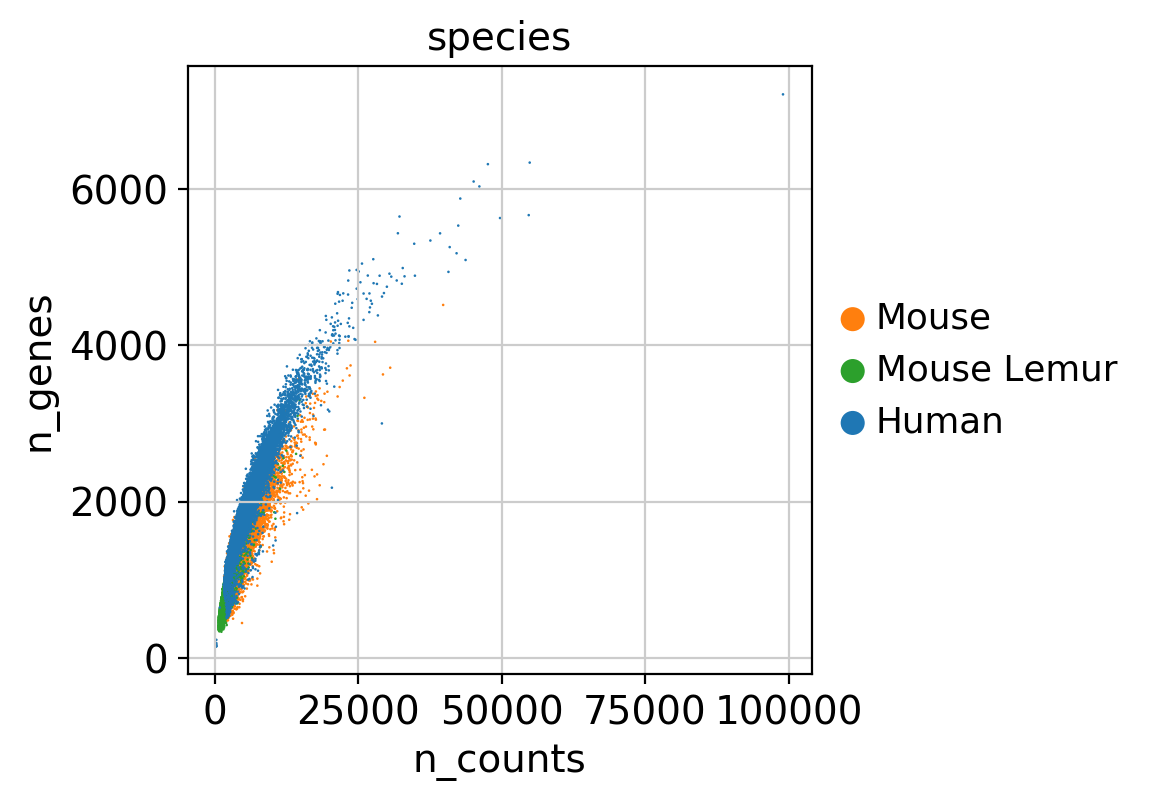

<Figure size 800x800 with 0 Axes>

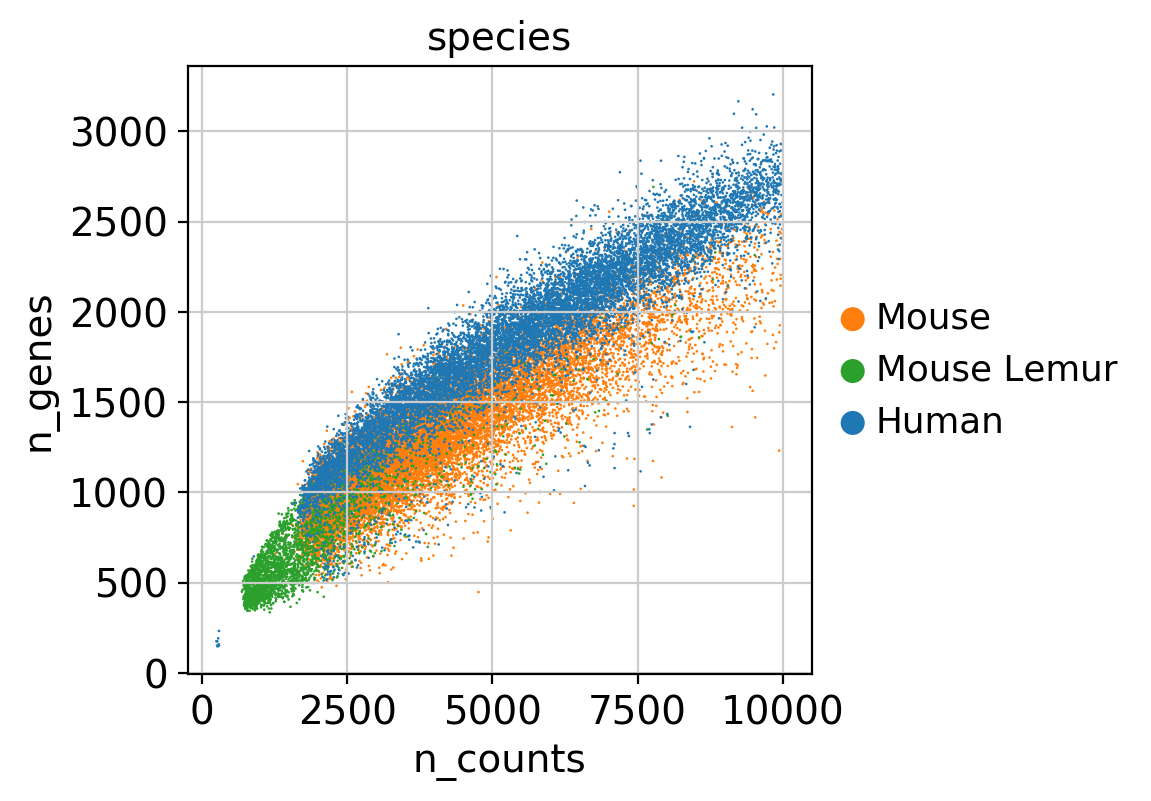

/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 800x800 with 0 Axes>

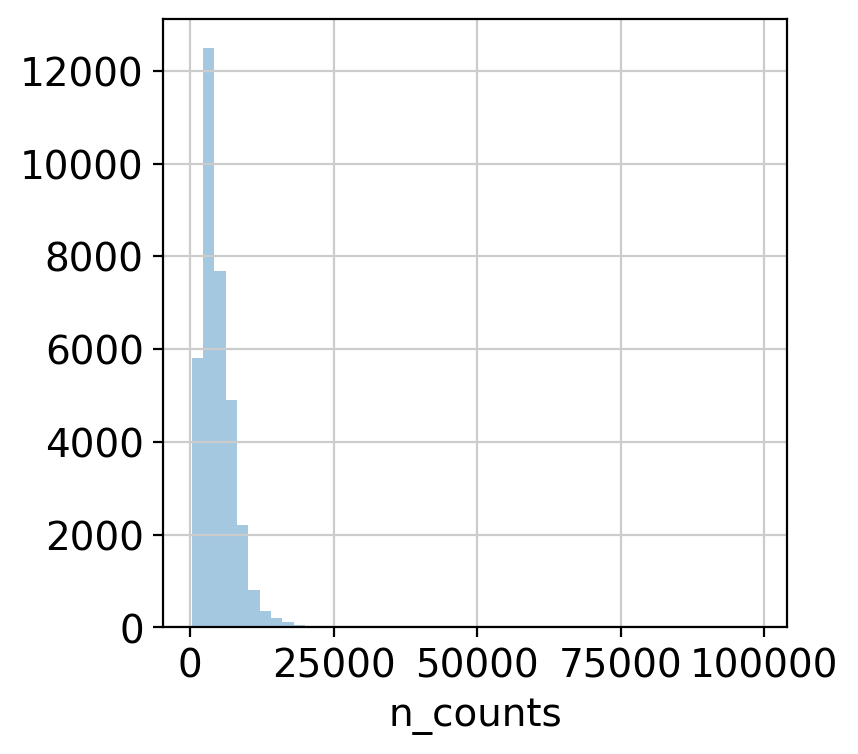

/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


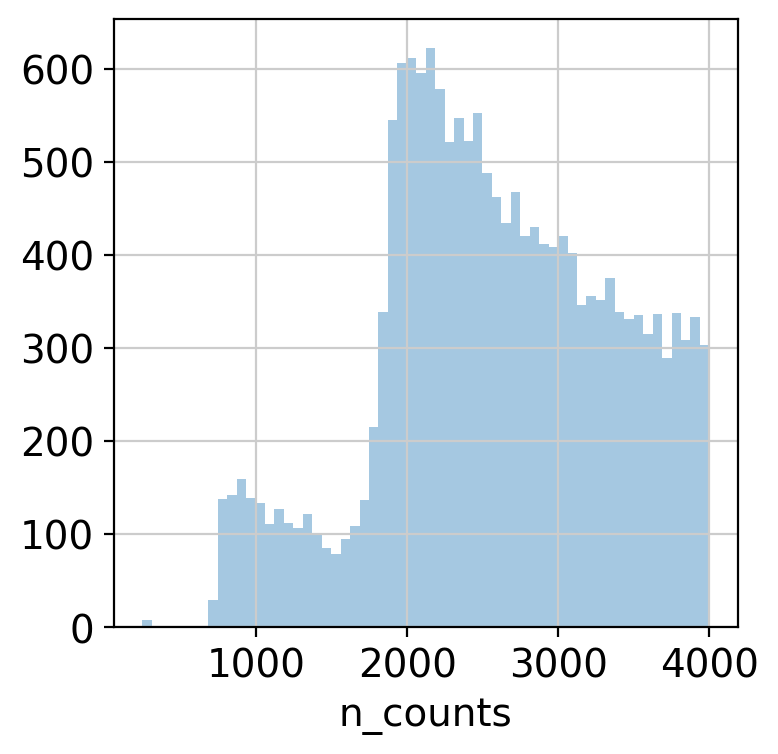

/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


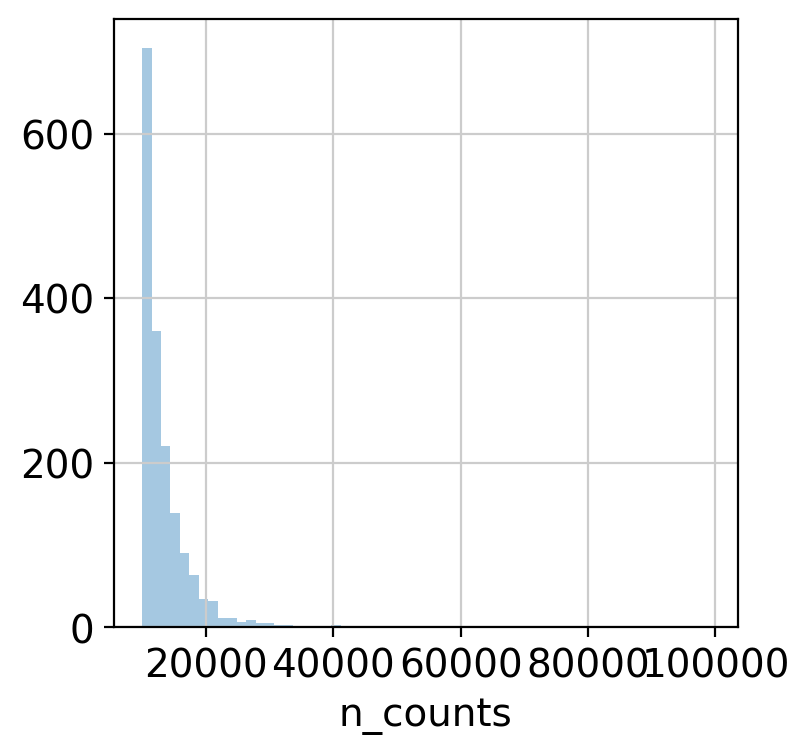

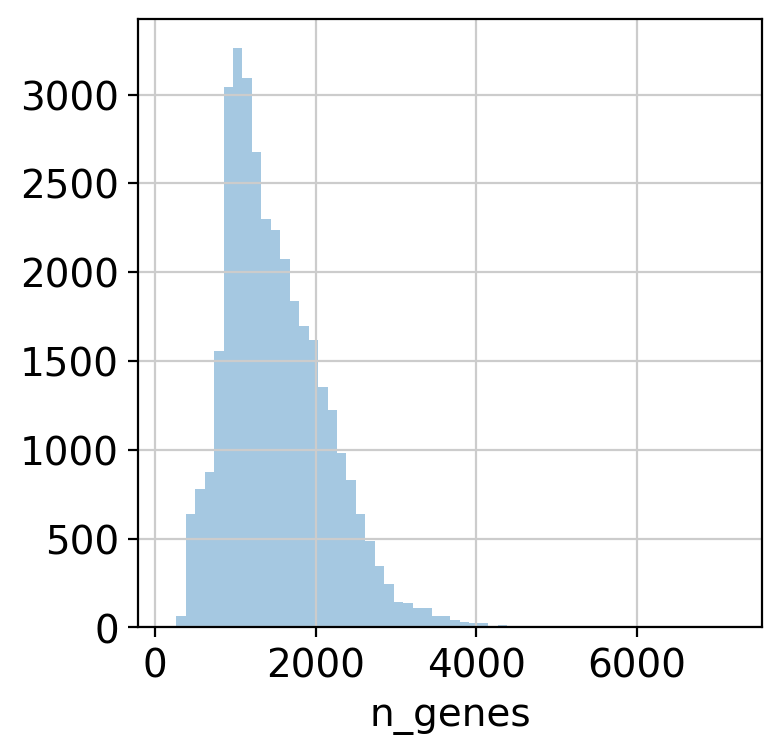

/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


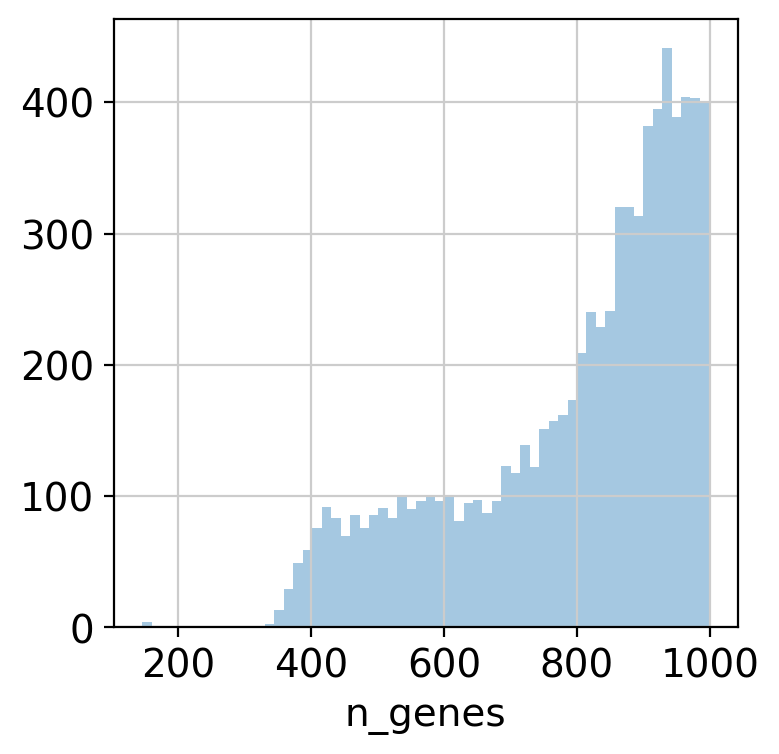

Total number of cells: 34703


filtered out 622 cells that have less than 1000 counts


Number of cells after min count filter: 34081
Number of cells after gene filter: 34081
Total number of genes: 13302


filtered out 396 genes that are detected in less than 3 cells
normalizing counts per cell


Number of genes after cell filter: 12906


    finished (0:00:00)


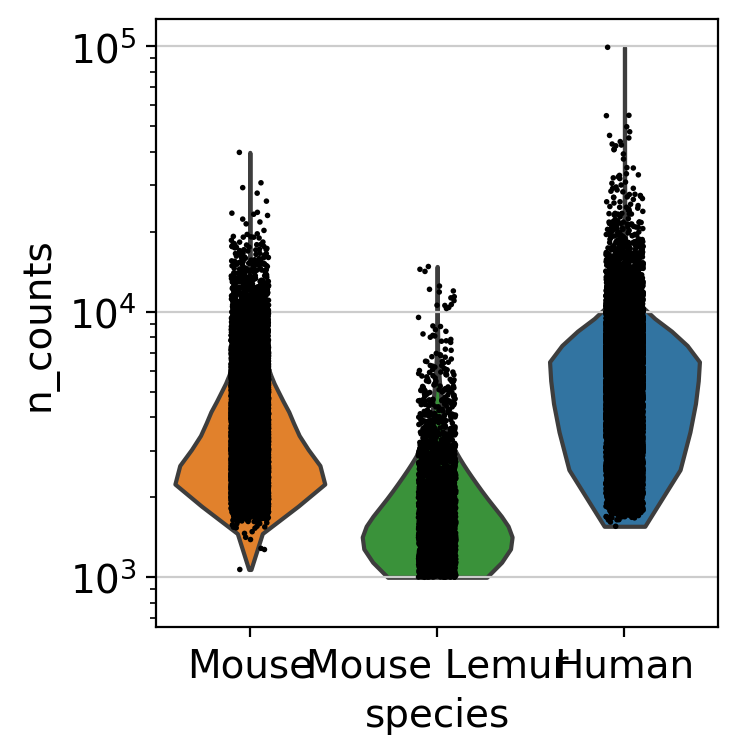

<Figure size 800x800 with 0 Axes>

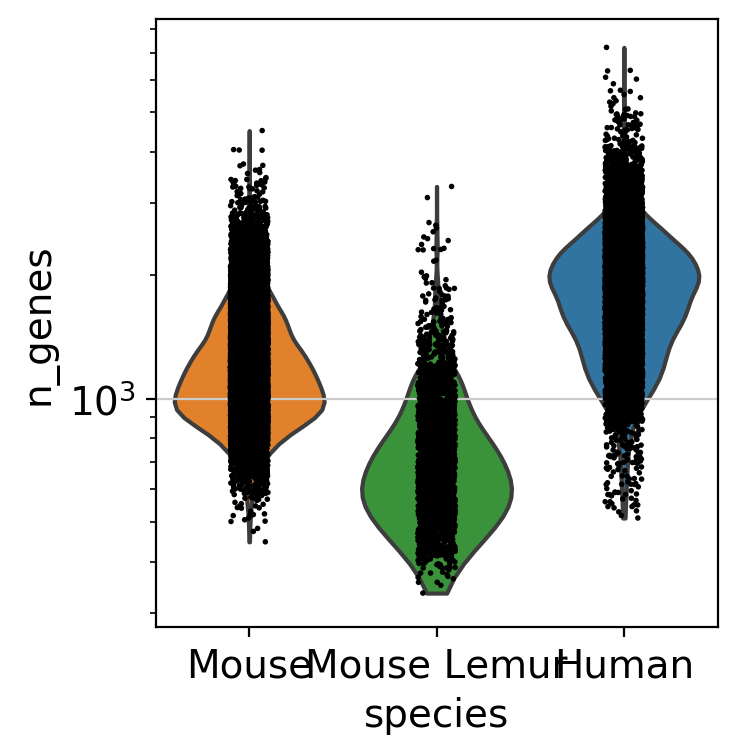

<Figure size 800x800 with 0 Axes>

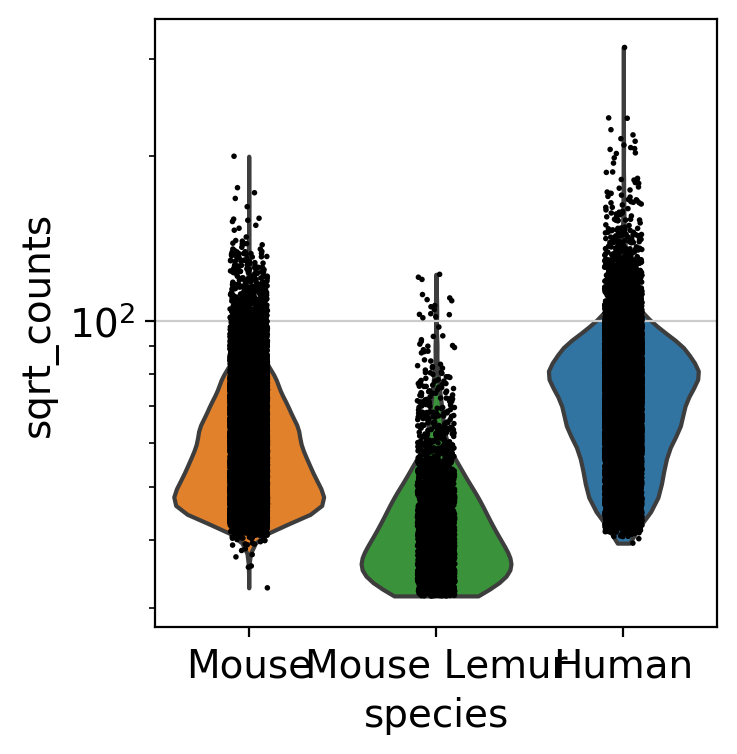

<Figure size 800x800 with 0 Axes>

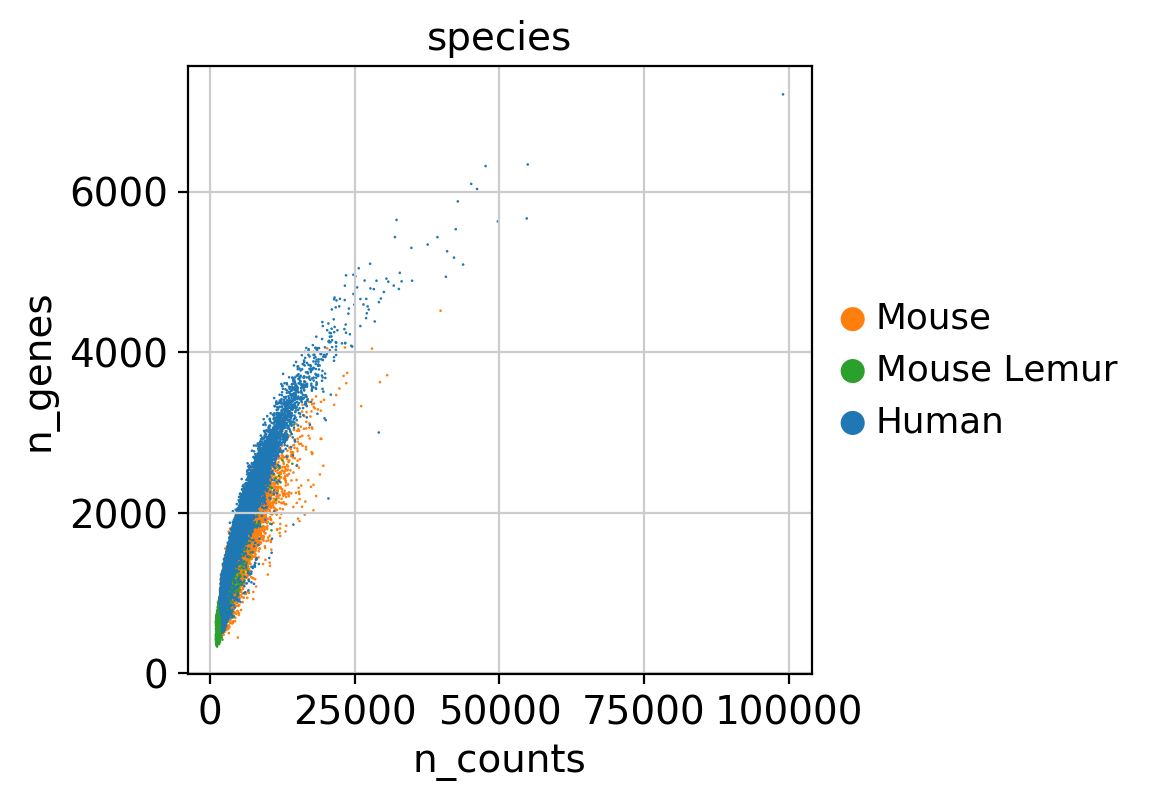

<Figure size 800x800 with 0 Axes>

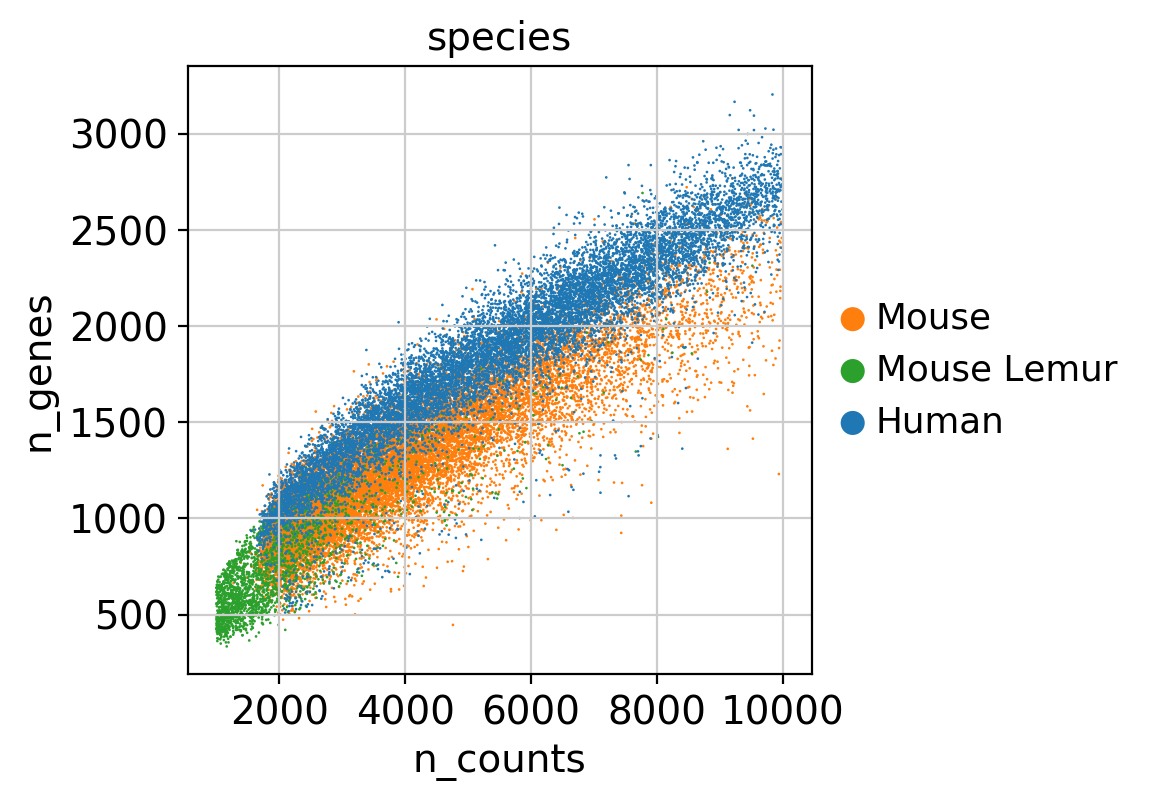

/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 800x800 with 0 Axes>

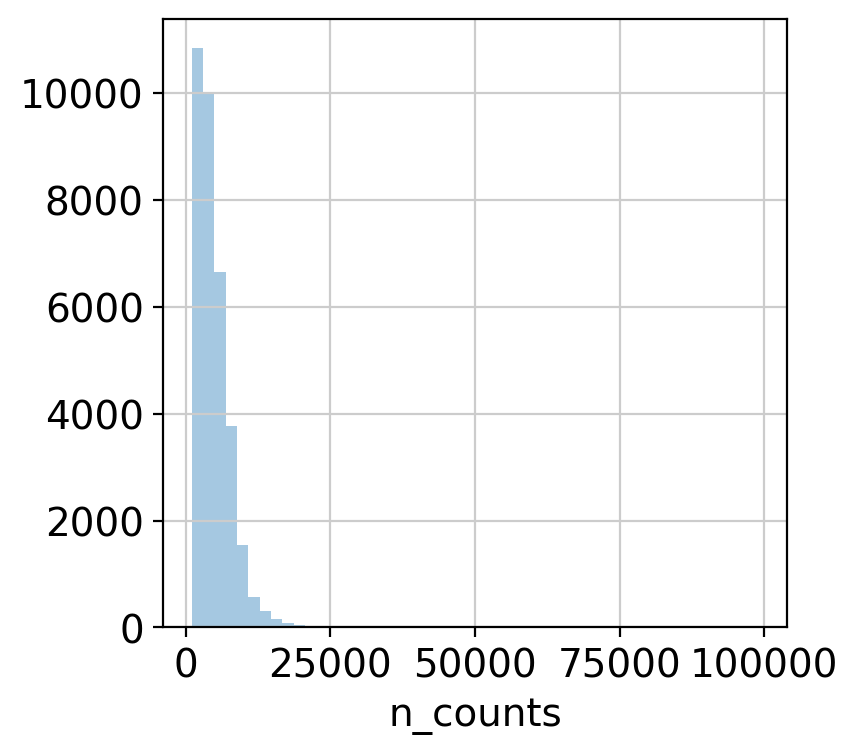

/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


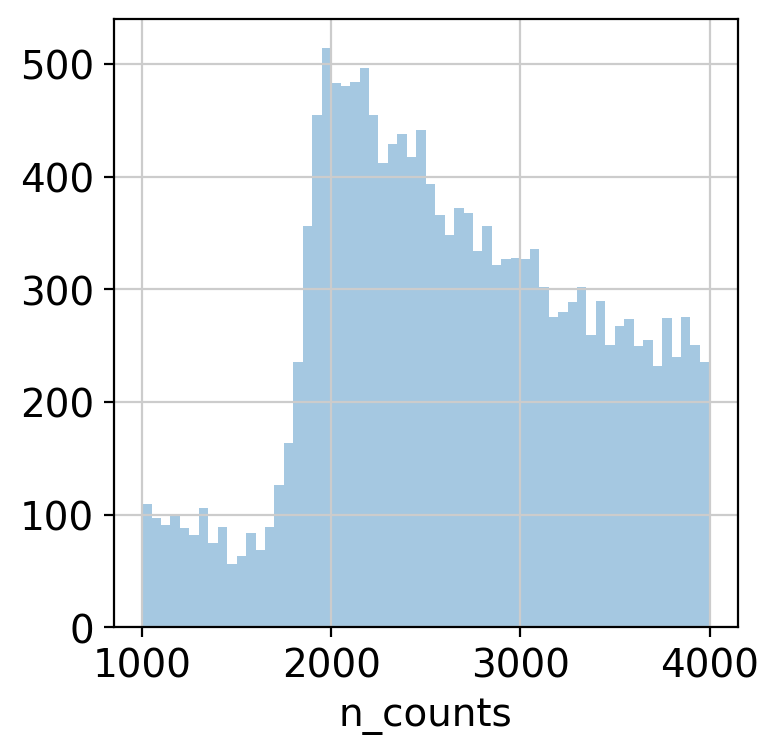

/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


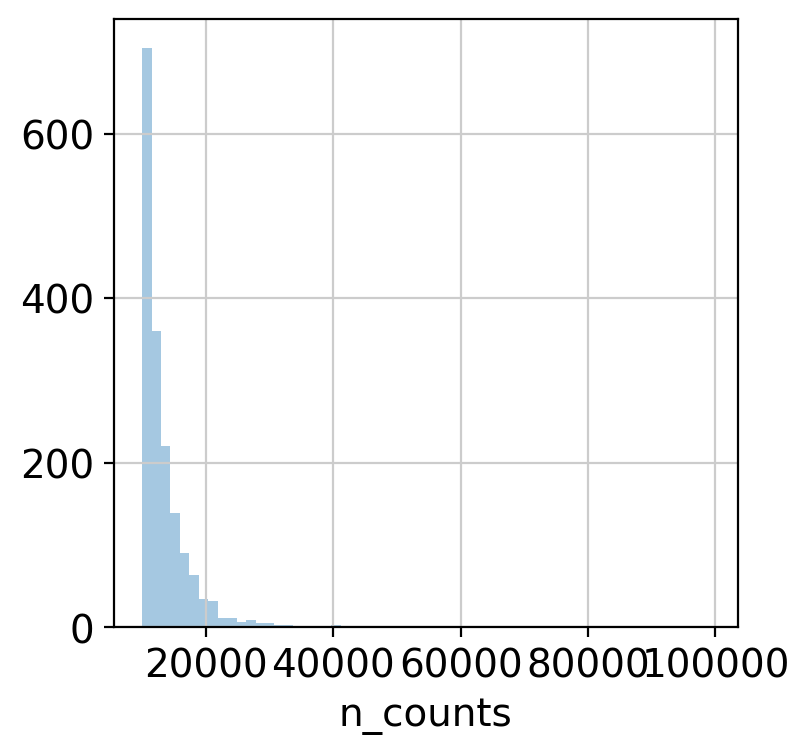

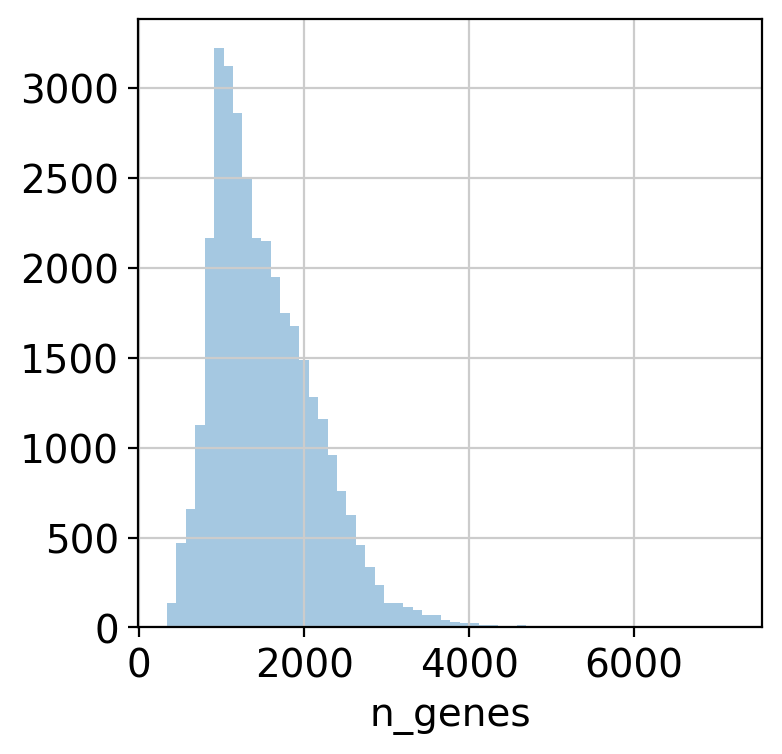

/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


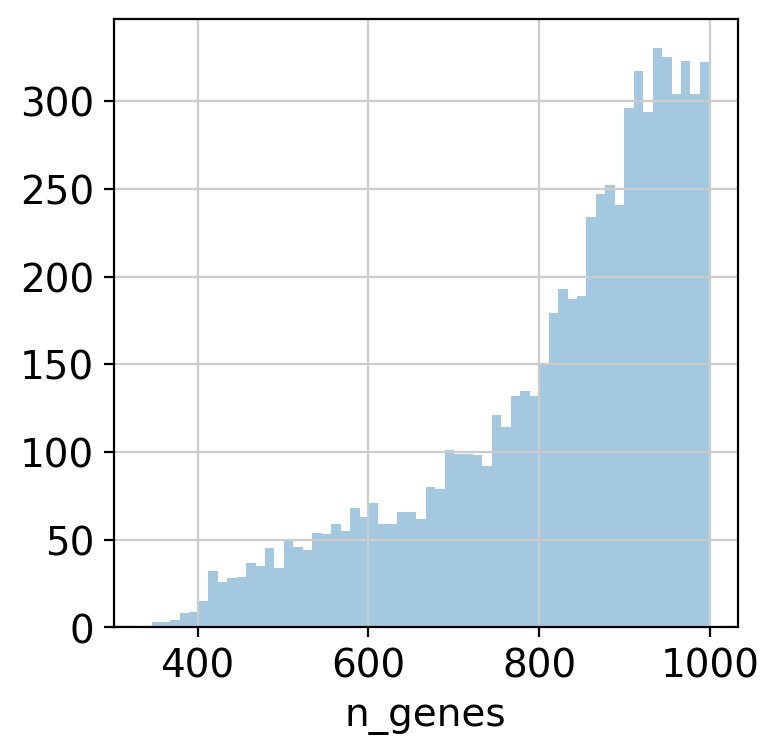

In [19]:
adata = preprocess.add_compartment_combined_cols(adata)
adata = preprocess.filter_genes_cells(adata)


# Filter min cells per group

In [20]:


adata = preprocess.filter_min_cells_per_group(
    adata,
    celltype_col=celltype_col,
    species_col=species_col,
    min_cells_per_celltype=20,
)


Filtering for celltype column narrow_group with at least 20 cells per species
--- Before filtering ---
-- Number of cell types: 60 --
narrow_group                                          species    
B cell                                                Mouse           824
                                                      Mouse Lemur     131
                                                      Human             4
B cell (PF)                                           Mouse             6
                                                      Mouse Lemur      10
                                                      Human             0
Schwann cell (NGFR+)                                  Mouse            52
                                                      Mouse Lemur       0
                                                      Human             0
T cell                                                Mouse           182
                                                      Mouse 

## Plot shared cell types

(30, 4)
--- compartment: endothelial ---


/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/seaborn/axisgrid.py:49: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set(**kwargs)


--- compartment: lymphoid ---


/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/seaborn/axisgrid.py:49: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set(**kwargs)


--- compartment: myeloid ---


/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/seaborn/axisgrid.py:49: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set(**kwargs)


--- compartment: stromal ---


/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout(*args, **kwargs)
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/seaborn/axisgrid.py:49: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set(**kwargs)
Saving figures: 100%|██████████| 4/4 [00:56<00:00, 14.22s/it]


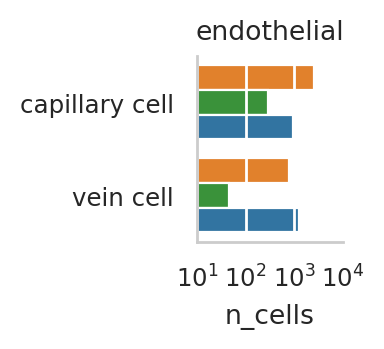

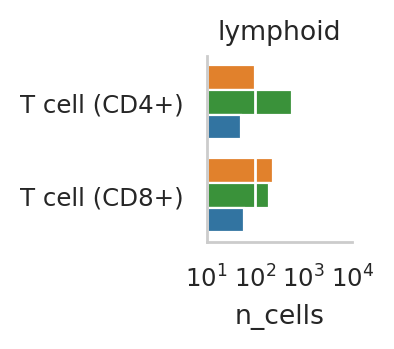

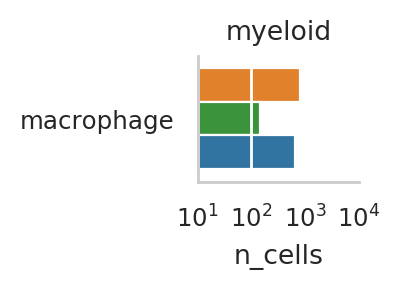

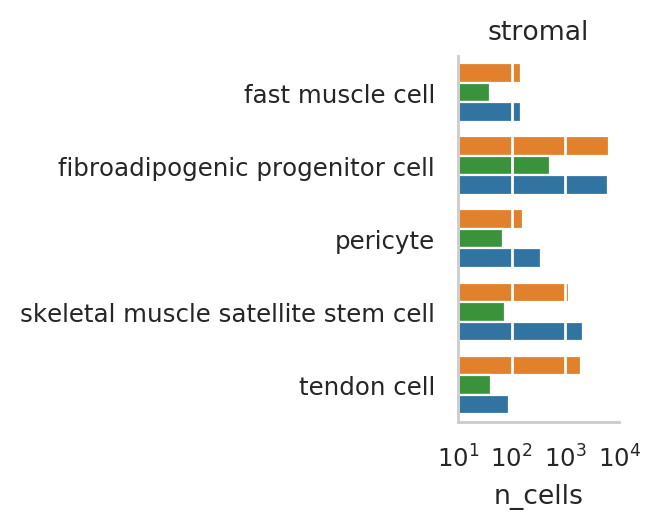

In [21]:
preprocess.plot_shared_cell_types(adata, celltype_col, compartment_col, species_col)
save_figures(os.path.join(figure_folder, 'shared_cell_types'))

## Table of shared cell types

In [22]:
adata.obs.groupby(['narrow_group', 'species']).size().unstack()

species                              Mouse  Mouse Lemur  Human
narrow_group                                                  
T cell (CD4+)                           97          582     51
T cell (CD8+)                          230          194     59
capillary cell                        2499          293    948
fast muscle cell                       147           39    152
fibroadipogenic progenitor cell       6483          520   6168
macrophage                             793          145    657
pericyte                               160           68    354
skeletal muscle satellite stem cell   1176           75   2158
tendon cell                           1944           42     89
vein cell                              777           45   1233

# Dimensionality reduction

## Do PCA + k-nearest neighbors pre-batch correction with BBKNN

extracting highly variable genes
    finished (0:00:08)
Trying to set attribute `.uns` of view, copying.
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
computing PCA
    on highly variable genes



 Number of highly variable genes: 3434


    with n_comps=50
    finished (0:00:43)


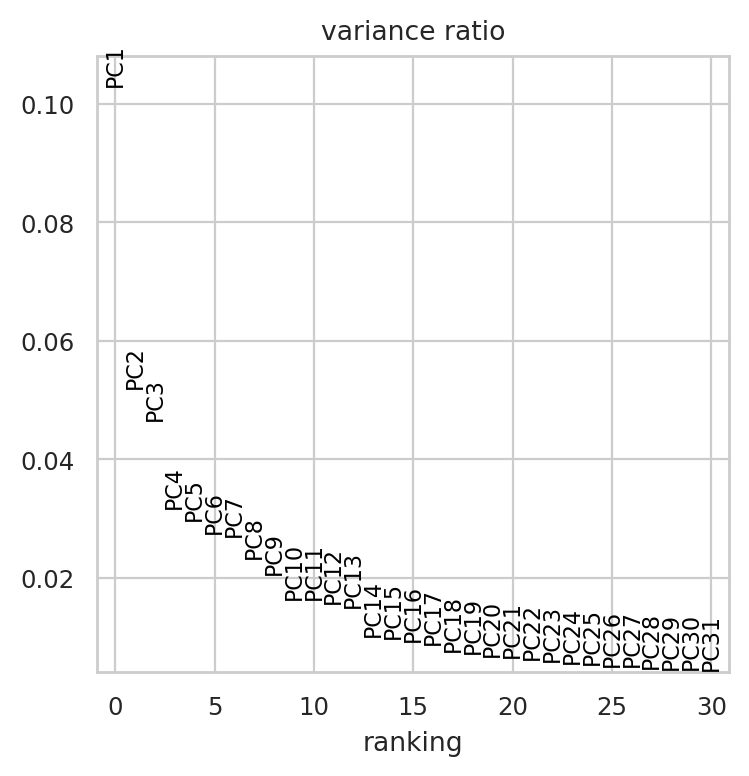

<Figure size 800x800 with 0 Axes>

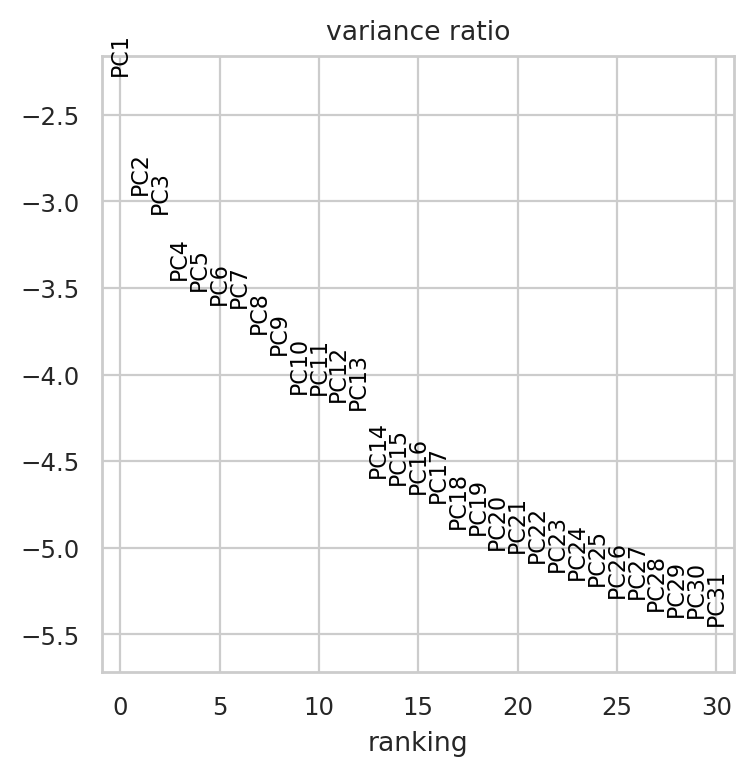

computing PCA
    on highly variable genes
    with n_comps=40
    finished (0:00:25)
computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:01:49)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:01:37)


<Figure size 800x800 with 0 Axes>

In [23]:
adata = preprocess.dimensionality_reduction(adata)


## Pre-bbknn umaps

Error plotting with colors=['species', 'species_batch', 'age', 'individual'], skipping


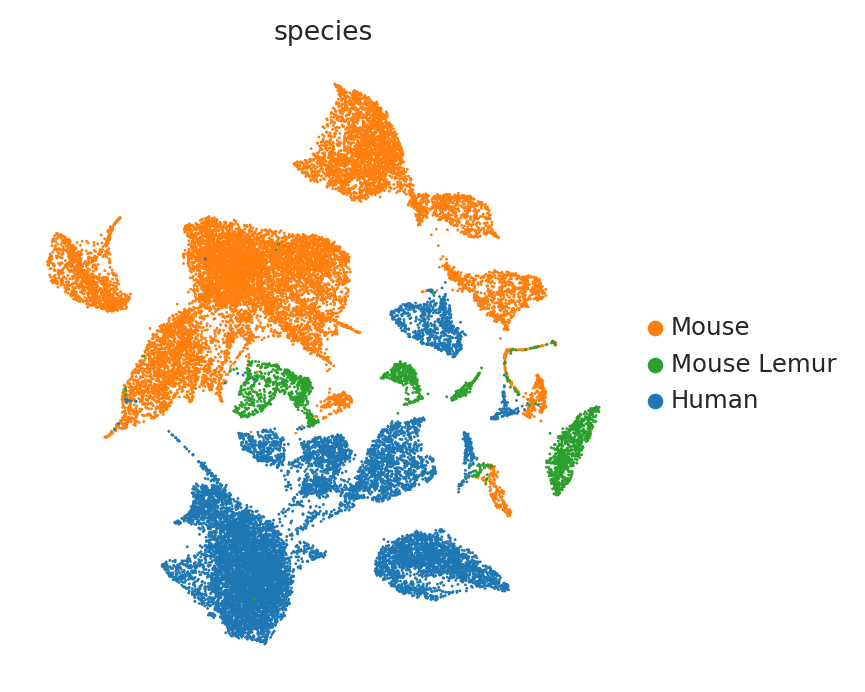

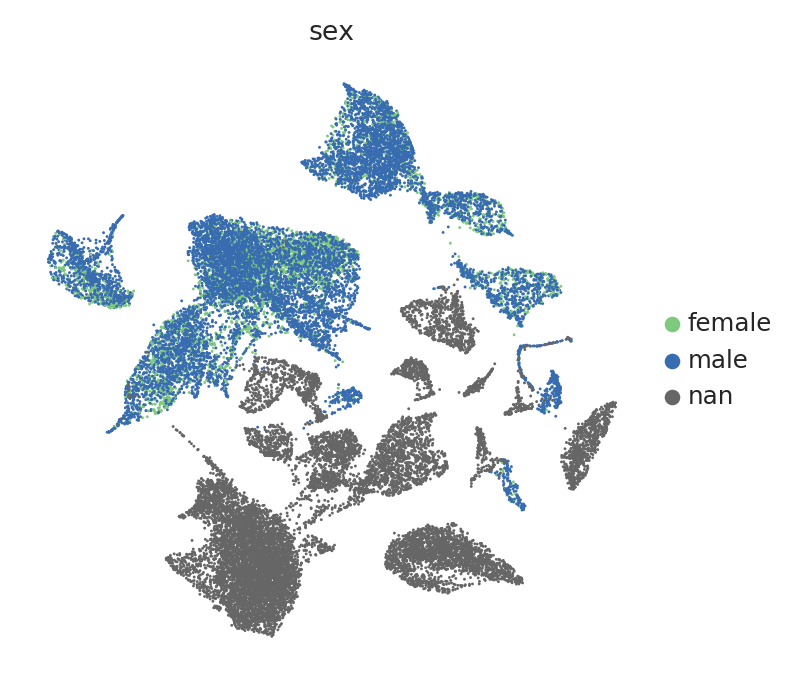

<Figure size 800x800 with 0 Axes>

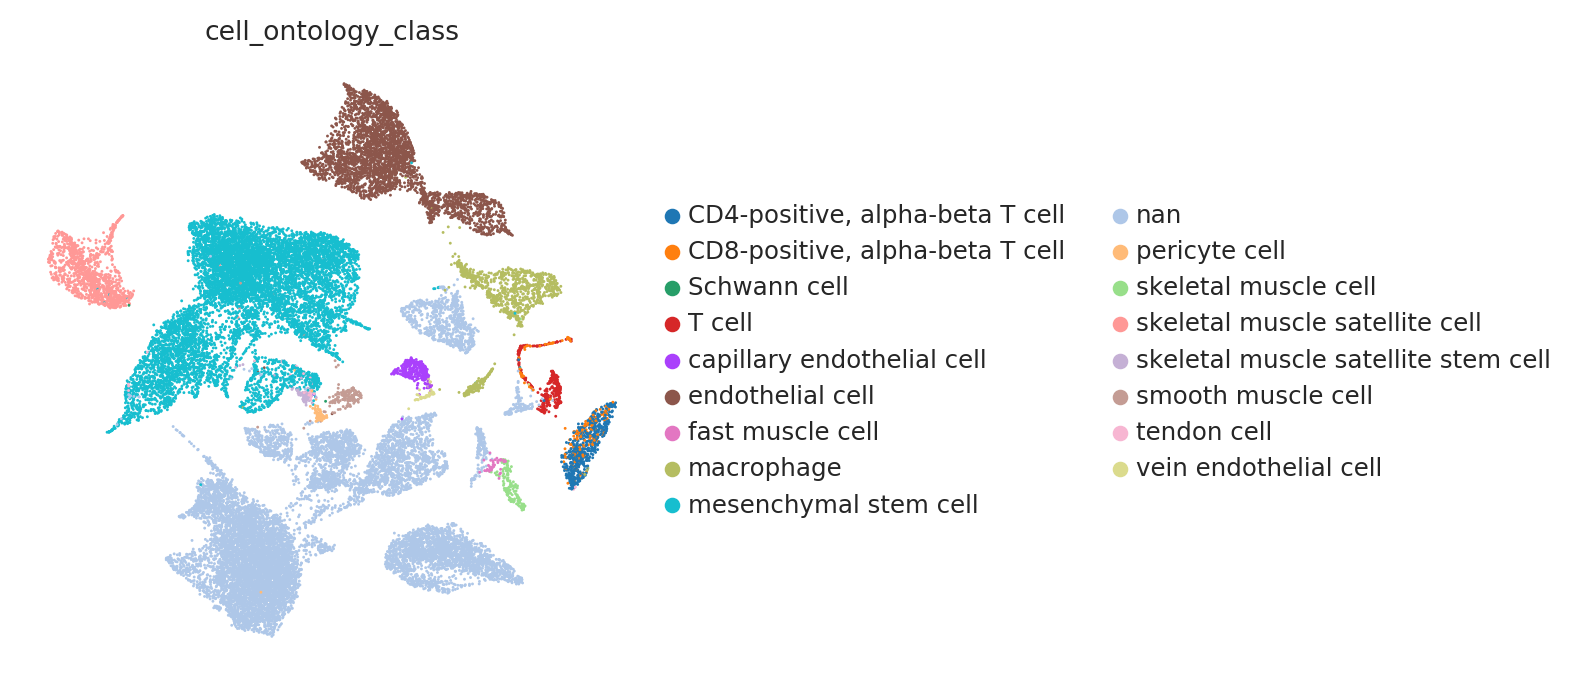

<Figure size 800x800 with 0 Axes>

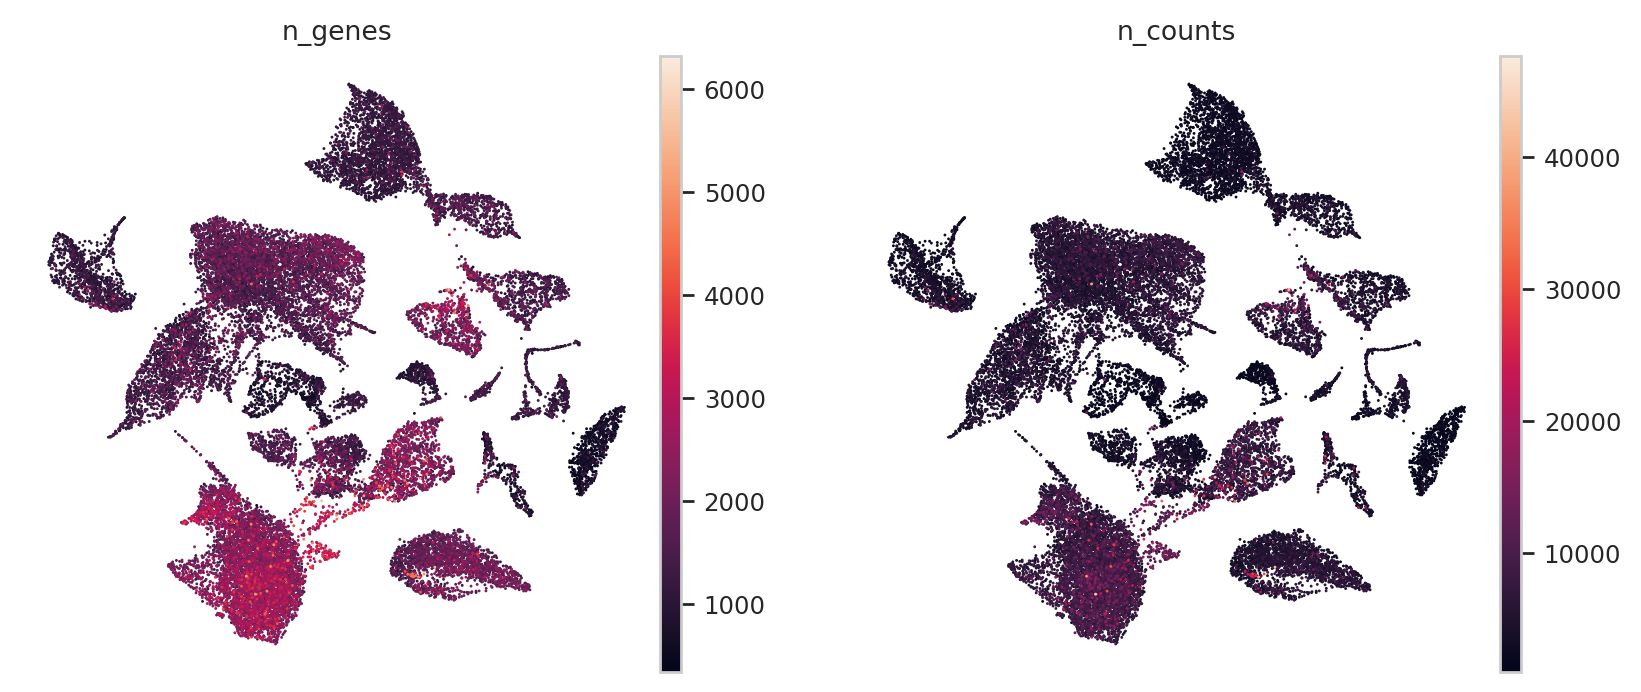

<Figure size 800x800 with 0 Axes>

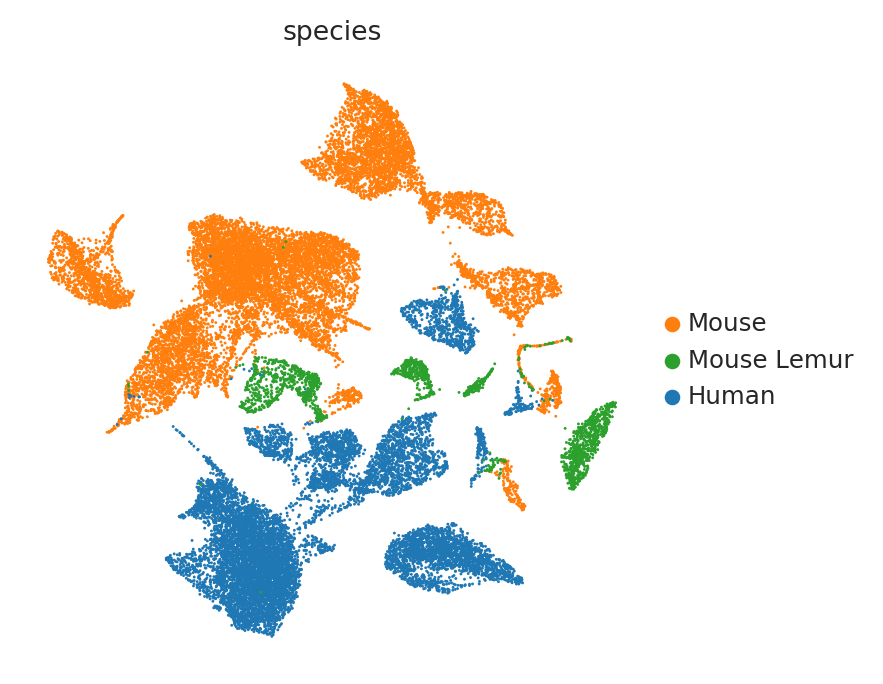

<Figure size 800x800 with 0 Axes>

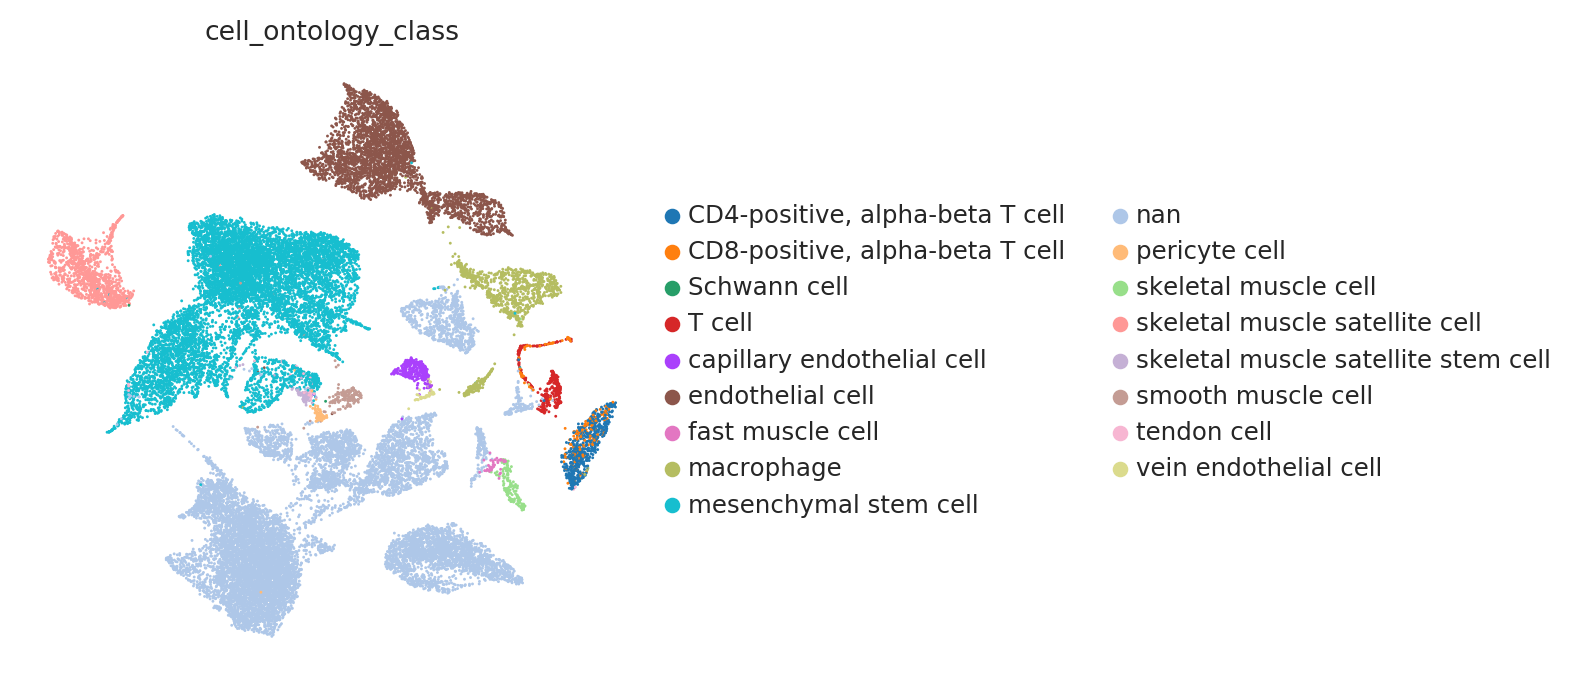

Error plotting with colors=['narrow_group', 'broad_group', 'compartment_group'], skipping
Error plotting with colors=narrow_group, skipping
Error plotting with colors=broad_group, skipping


<Figure size 800x800 with 0 Axes>

<Figure size 2898x800 with 0 Axes>

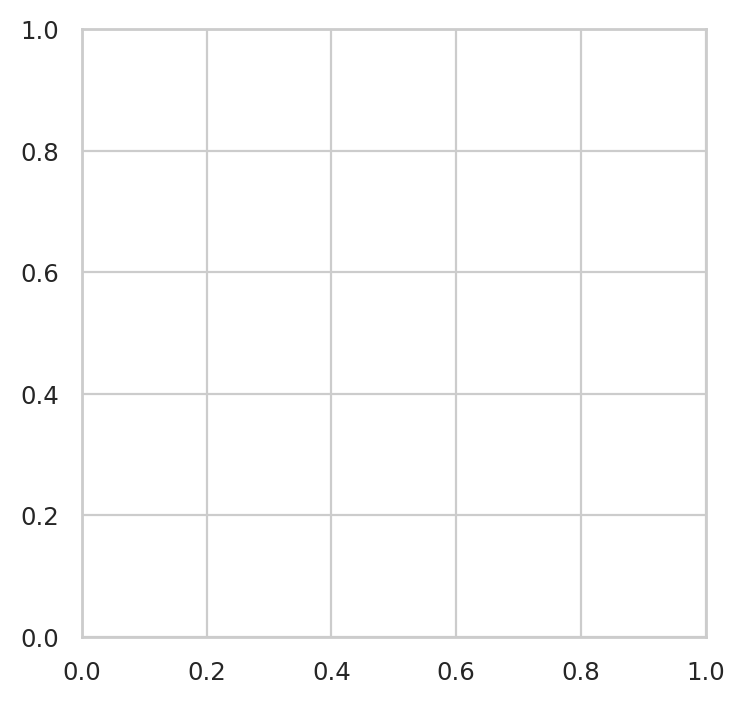

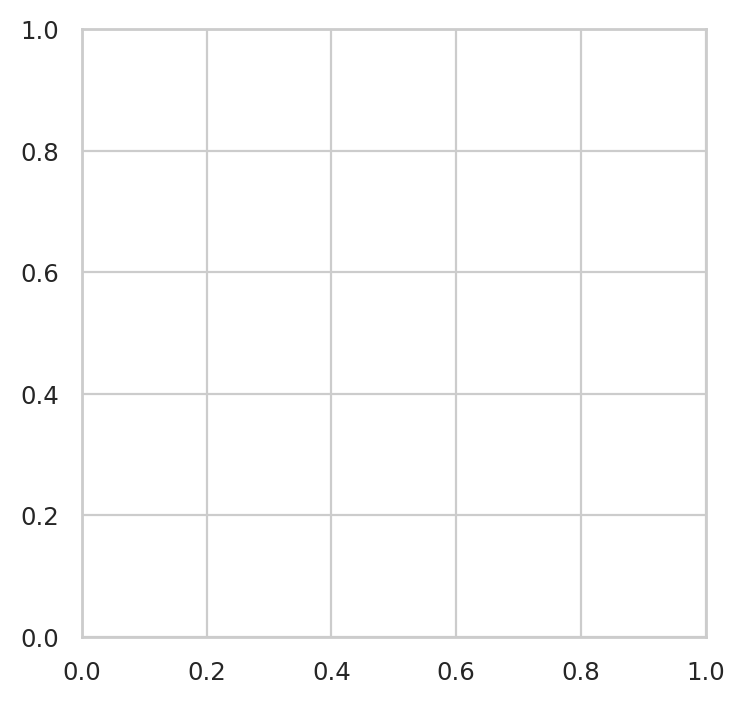

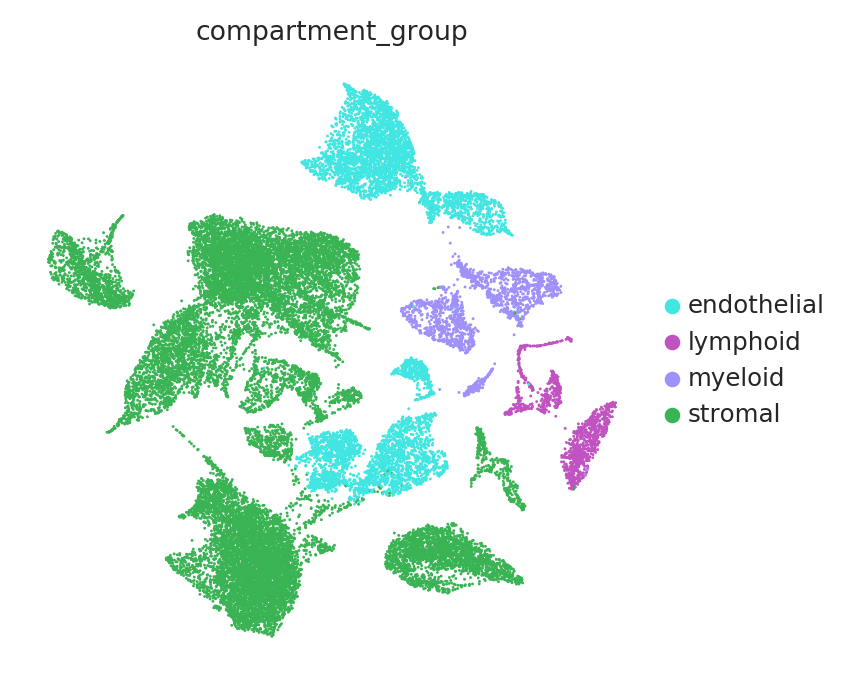

<Figure size 800x800 with 0 Axes>

In [24]:
# Pre-BBKNN UMAPs
preprocess.plot_umaps(adata)

## Do BBKNN, draw new umaps

In [25]:
preprocess.run_bbknn(adata)

computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:08)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:49)


### Remove `adata.uns` palette colors because there is a bug

In [26]:
preprocess.remove_color_palettes(adata)

removing 'species_colors'
removing 'species_batch_colors'
removing 'sex_colors'
removing 'cell_ontology_class_colors'
removing 'narrow_group_colors'
removing 'broad_group_colors'
removing 'compartment_group_colors'


### Species

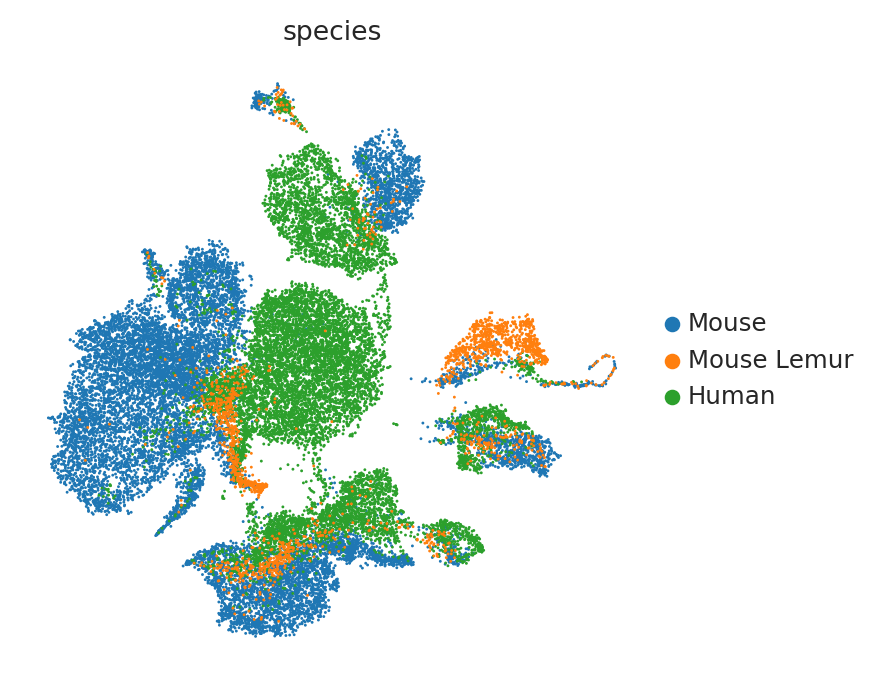

In [27]:
tab10 = sns.color_palette('tab10')
sc.pl.umap(adata, color='species', palette=tab10[:3], save='__species')

### Compartment group

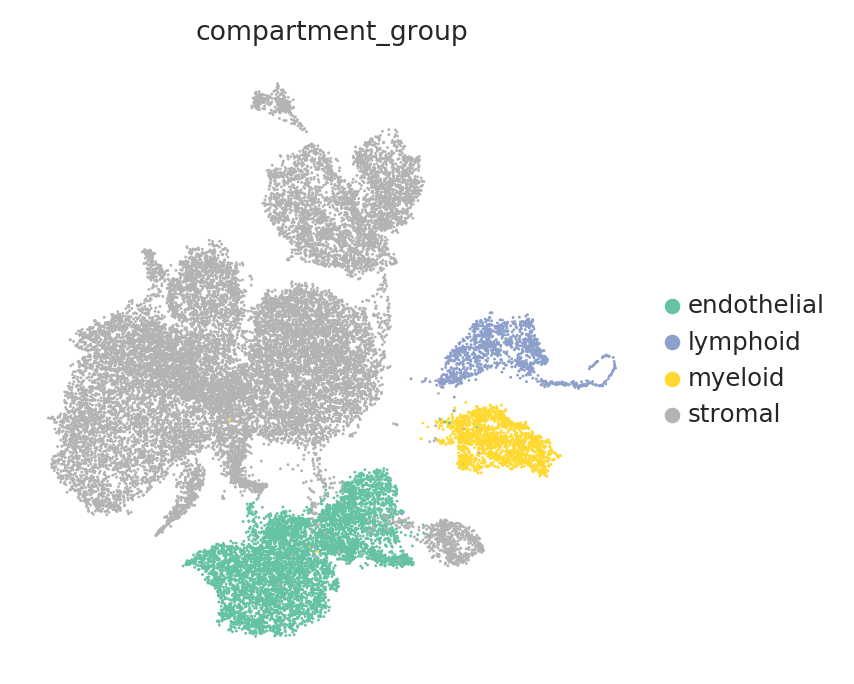

In [28]:
# there is some bug when the palette is pre-set
try:
    del adata.uns['compartment_group_colors']
except KeyError:
    pass

sc.pl.umap(adata, color='compartment_group', save='__compartment_group', palette='Set2')

### Narrow group

removing 'species_colors'
removing 'compartment_group_colors'


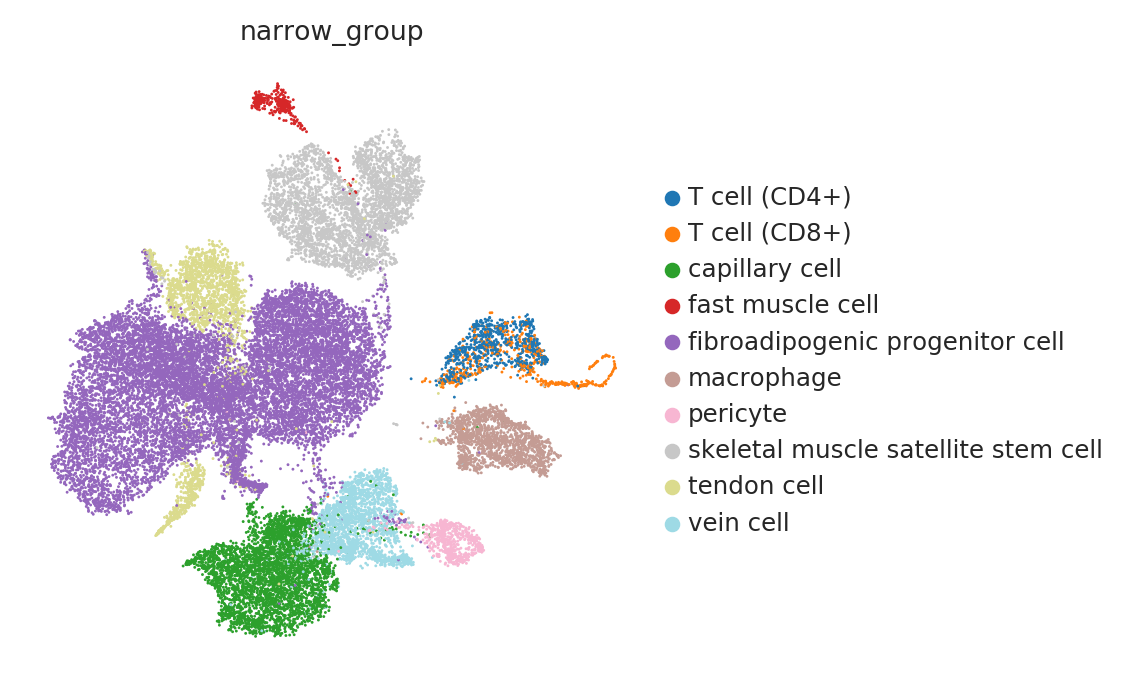

In [29]:
preprocess.remove_color_palettes(adata)
sc.pl.umap(adata, color='narrow_group', palette='tab20', save='__narrow_group')

## Match the cell type colors to the paper

In [30]:
metadata = pd.read_csv(
    "/home/olga/googledrive/TabulaMicrocebus/data/h5ad-objs/ss2-10x-combined/LCA_SS2_10x_metadata_v1_wColor_wOrder.csv",
    index_col=0,
)
metadata = metadata.query('tissue == "Limb_muscle" and method == "10x"')
print(metadata.shape)
metadata.head()

/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (8,12,34,35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(3125, 41)


nCount_RNA  nFeature_RNA  \
Stumpy_Limb_muscle_10X_AAACCTGAGTCCGGTC        2972          1027   
Stumpy_Limb_muscle_10X_AAACCTGAGTGGTAAT        3106          1639   
Stumpy_Limb_muscle_10X_AAACCTGCACCCAGTG        1719           842   
Stumpy_Limb_muscle_10X_AAACCTGCATTAGGCT        3312          1246   
Stumpy_Limb_muscle_10X_AAACCTGGTCATATCG        1690           710   

                                                                       cell_name  \
Stumpy_Limb_muscle_10X_AAACCTGAGTCCGGTC  Stumpy_Limb_muscle_10X_AAACCTGAGTCCGGTC   
Stumpy_Limb_muscle_10X_AAACCTGAGTGGTAAT  Stumpy_Limb_muscle_10X_AAACCTGAGTGGTAAT   
Stumpy_Limb_muscle_10X_AAACCTGCACCCAGTG  Stumpy_Limb_muscle_10X_AAACCTGCACCCAGTG   
Stumpy_Limb_muscle_10X_AAACCTGCATTAGGCT  Stumpy_Limb_muscle_10X_AAACCTGCATTAGGCT   
Stumpy_Limb_muscle_10X_AAACCTGGTCATATCG  Stumpy_Limb_muscle_10X_AAACCTGGTCATATCG   

                                         cell_barcode_10x  \
Stumpy_Limb_muscle_10X_AAACCTGAGTCCGGTC  AAACCTGAGTCCGGTC   
Stumpy_Limb_muscle_10X_AAACCTGAGTGGTAAT  AAACCTGAGTGGTAAT   
Stumpy_Limb_muscle_10X_AAACCTGCACCCAGTG  AAACCTGCACCCAGTG   
Stumpy_Limb_muscle_10X_AAACCTGCATTAGGCT  AAACCTGCATTAGGCT   
Stumpy_Limb_muscle_10X_AAACCTGGTCATATCG  AAACCTGGTCATATCG   

                                                    sequencing_run_10x  \
Stumpy_Limb_muscle_10X_AAACCTGAGTCCGGTC  170919_A00111_0061_BH3FYJDMXX   
Stumpy_Limb_muscle_10X_AAACCTGAGTGGTAAT  170919_A00111_0061_BH3FYJDMXX   
Stumpy_Limb_muscle_10X_AAACCTGCACCCAGTG  170919_A00111_0061_BH3FYJDMXX   
Stumpy_Limb_muscle_10X_AAACCTGCATTAGGCT  170919_A00111_0061_BH3FYJDMXX   
Stumpy_Limb_muscle_10X_AAACCTGGTCATATCG  170919_A00111_0061_BH3FYJDMXX   

                                                    channel_10x  batch_SS2  \
Stumpy_Limb_muscle_10X_AAACCTGAGTCCGGTC  Stumpy_Limb_muscle_10X          0   
Stumpy_Limb_muscle_10X_AAACCTGAGTGGTAAT  Stumpy_Limb_muscle_10X          0   
Stumpy_Limb_muscle_10X_AAACCTGCACCCAGTG  Stumpy_Limb_muscle_10X          0   
Stumpy_Limb_muscle_10X_AAACCTGCATTAGGCT  Stumpy_Limb_muscle_10X          0   
Stumpy_Limb_muscle_10X_AAACCTGGTCATATCG  Stumpy_Limb_muscle_10X          0   

                                        possibly_contaminated_barcode_10x  \
Stumpy_Limb_muscle_10X_AAACCTGAGTCCGGTC                             False   
Stumpy_Limb_muscle_10X_AAACCTGAGTGGTAAT                             False   
Stumpy_Limb_muscle_10X_AAACCTGCACCCAGTG                             False   
Stumpy_Limb_muscle_10X_AAACCTGCATTAGGCT                             False   
Stumpy_Limb_muscle_10X_AAACCTGGTCATATCG                             False   

                                        method individual  ...  \
Stumpy_Limb_muscle_10X_AAACCTGAGTCCGGTC    10x     Stumpy  ...   
Stumpy_Limb_muscle_10X_AAACCTGAGTGGTAAT    10x     Stumpy  ...   
Stumpy_Limb_muscle_10X_AAACCTGCACCCAGTG    10x     Stumpy  ...   
Stumpy_Limb_muscle_10X_AAACCTGCATTAGGCT    10x     Stumpy  ...   
Stumpy_Limb_muscle_10X_AAACCTGGTCATATCG    10x     Stumpy  ...   

                                        dendrogram_annotation_order  \
Stumpy_Limb_muscle_10X_AAACCTGAGTCCGGTC                       119.0   
Stumpy_Limb_muscle_10X_AAACCTGAGTGGTAAT                         NaN   
Stumpy_Limb_muscle_10X_AAACCTGCACCCAGTG                       119.0   
Stumpy_Limb_muscle_10X_AAACCTGCATTAGGCT                       119.0   
Stumpy_Limb_muscle_10X_AAACCTGGTCATATCG                       170.0   

                                        mix_hybrid low_quality asterix  \
Stumpy_Limb_muscle_10X_AAACCTGAGTCCGGTC        NaN         NaN     NaN   
Stumpy_Limb_muscle_10X_AAACCTGAGTGGTAAT        NaN         NaN     NaN   
Stumpy_Limb_muscle_10X_AAACCTGCACCCAGTG        NaN         NaN     NaN   
Stumpy_Limb_muscle_10X_AAACCTGCATTAGGCT        NaN         NaN     NaN   
Stumpy_Limb_muscle_10X_AAACCTGGTCATATCG        NaN         NaN     NaN   

                                        dendrogram_subgroup_color_hex  \
Stumpy_Limb_muscle_10X_AAACCTGAGTCC

In [31]:
metadata_colors = metadata[
    [
        x
        for x in metadata.columns
        if ("dendrogram" in x or "color" in x) and ("name" in x or "hex" in x)
    ]
]
hex_cols = [x for x in metadata_colors.columns if "hex" in x]
metadata_colors[hex_cols] = "#" + metadata_colors[hex_cols]
metadata_colors.head()

/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


dendrogram_group_name  \
Stumpy_Limb_muscle_10X_AAACCTGAGTCCGGTC               stromal   
Stumpy_Limb_muscle_10X_AAACCTGAGTGGTAAT                   NaN   
Stumpy_Limb_muscle_10X_AAACCTGCACCCAGTG               stromal   
Stumpy_Limb_muscle_10X_AAACCTGCATTAGGCT               stromal   
Stumpy_Limb_muscle_10X_AAACCTGGTCATATCG                immune   

                                        dendrogram_group_color_name  \
Stumpy_Limb_muscle_10X_AAACCTGAGTCCGGTC                       green   
Stumpy_Limb_muscle_10X_AAACCTGAGTGGTAAT                         NaN   
Stumpy_Limb_muscle_10X_AAACCTGCACCCAGTG                       green   
Stumpy_Limb_muscle_10X_AAACCTGCATTAGGCT                       green   
Stumpy_Limb_muscle_10X_AAACCTGGTCATATCG                     magenta   

                                        dendrogram_group_color_hex  \
Stumpy_Limb_muscle_10X_AAACCTGAGTCCGGTC                    #39b353   
Stumpy_Limb_muscle_10X_AAACCTGAGTGGTAAT                        NaN   
Stumpy_Limb_muscle_10X_AAACCTGCACCCAGTG                    #39b353   
Stumpy_Limb_muscle_10X_AAACCTGCATTAGGCT                    #39b353   
Stumpy_Limb_muscle_10X_AAACCTGGTCATATCG                    #c152c1   

                                        dendrogram_subgroup_name  \
Stumpy_Limb_muscle_10X_AAACCTGAGTCCGGTC               fibroblast   
Stumpy_Limb_muscle_10X_AAACCTGAGTGGTAAT                      NaN   
Stumpy_Limb_muscle_10X_AAACCTGCACCCAGTG               fibroblast   
Stumpy_Limb_muscle_10X_AAACCTGCATTAGGCT               fibroblast   
Stumpy_Limb_muscle_10X_AAACCTGGTCATATCG                NK_T cell   

                                        dendrogram_subgroup_color_hex  
Stumpy_Limb_muscle_10X_AAACCTGAGTCCGGTC                       #61c275  
Stumpy_Limb_muscle_10X_AAACCTGAGTGGTAAT                           NaN  
Stumpy_Limb_muscle_10X_AAACCTGCACCCAGTG                       #61c275  
Stumpy_Limb_muscle_10X_AAACCTGCATTAGGCT                       #61c275  
Stumpy_Limb_muscle_10X_AAACCTGGTCATATCG                       #da97da

In [32]:
adata.obs.head()

age cell_id  \
AAACCTGCAATAACGA-1-14-0-0-1-mouse_tabula_muris_...  18m     nan   
AAACCTGCAGCGTAAG-1-14-0-0-1-mouse_tabula_muris_...  18m     nan   
AAACCTGGTAGCTTGT-1-14-0-0-1-mouse_tabula_muris_...  18m     nan   
AAAGCAAGTCTGGTCG-1-14-0-0-1-mouse_tabula_muris_...  18m     nan   
AAAGTAGGTGGACGAT-1-14-0-0-1-mouse_tabula_muris_...  18m     nan   

                                                      cell_ontology_class  \
AAACCTGCAATAACGA-1-14-0-0-1-mouse_tabula_muris_...       endothelial cell   
AAACCTGCAGCGTAAG-1-14-0-0-1-mouse_tabula_muris_...  mesenchymal stem cell   
AAACCTGGTAGCTTGT-1-14-0-0-1-mouse_tabula_muris_...  mesenchymal stem cell   
AAAGCAAGTCTGGTCG-1-14-0-0-1-mouse_tabula_muris_...  mesenchymal stem cell   
AAAGTAGGTGGACGAT-1-14-0-0-1-mouse_tabula_muris_...  mesenchymal stem cell   

                                                   cell_ontology_id  \
AAACCTGCAATAACGA-1-14-0-0-1-mouse_tabula_muris_...               NA   
AAACCTGCAGCGTAAG-1-14-0-0-1-mouse_tabula_muris_...               NA   
AAACCTGGTAGCTTGT-1-14-0-0-1-mouse_tabula_muris_...               NA   
AAAGCAAGTCTGGTCG-1-14-0-0-1-mouse_tabula_muris_...               NA   
AAAGTAGGTGGACGAT-1-14-0-0-1-mouse_tabula_muris_...               NA   

                                                                    free_annotation  \
AAACCTGCAATAACGA-1-14-0-0-1-mouse_tabula_muris_...                   capillary cell   
AAACCTGCAGCGTAAG-1-14-0-0-1-mouse_tabula_muris_...                      tendon cell   
AAACCTGGTAGCTTGT-1-14-0-0-1-mouse_tabula_muris_...  fibroadipogenic progenitor cell   
AAAGCAAGTCTGGTCG-1-14-0-0-1-mouse_tabula_muris_...  fibroadipogenic progenitor cell   
AAAGTAGGTGGACGAT-1-14-0-0-1-mouse_tabula_muris_...  fibroadipogenic progenitor cell   

                                                    n_genes     sex subtissue  \
AAACCTGCAATAACGA-1-14-0-0-1-mouse_tabula_muris_...     1078  female  Pre-Sort   
AAACCTGCAGCGTAAG-1-14-0-0-1-mouse_tabula_muris_...     1177  female  Pre-Sort   
AAACCTGGTAGCTTGT-1-14-0-0-1-mouse_tabula_muris_...     1316  female  Pre-Sort   
AAAGCAAGTCTGGTCG-1-14-0-0-1-mouse_tabula_muris_...      860  female  Pre-Sort   
AAAGTAGGTGGACGAT-1-14-0-0-1-mouse_tabula_muris_...     1226  female  Pre-Sort   

                                                    tissue species  ...  \
AAACCTGCAATAACGA-1-14-0-0-1-mouse_tabula_muris_...  Muscle   Mouse  ...   
AAACCTGCAGCGTAAG-1-14-0-0-1-mouse_tabula_muris_...  Muscle   Mouse  ...   
AAACCTGGTAGCTTGT-1-14-0-0-1-mouse_tabula_muris_...  Muscle   Mouse  ...   
AAAGCAAGTCTGGTCG-1-14-0-0-1-mouse_tabula_muris_...  Muscle   Mouse  ...   
AAAGTAGGTGGACGAT-1-14-0-0-1-mouse_tabula_muris_...  Muscle   Mouse  ...   

                                                   pct_counts_in_top_100_genes  \
AAACCTGCAATAACGA-1-14-0-0-1-mouse_tabula_muris_...                   44.664816   
AAACCTGCAGCGTAAG-1-14-0-0-1-mouse_tabula_muris_...                   55.930416   
AAACCTGGTAGCTTGT-1-14-0-0-1-mouse_tabula_muris_...                   41.641642   
AAAGCAAGTCTGGTCG-1-14-0-0-1-mouse_tabula_muris_...                   49.366447   
AAAGTAGGTGGACGAT-1-14-0-0-1-mouse_tabula_muris_...                   39.464286   

                                                   pct_counts_in_top_200_genes  \
AAACCTGCAATAACGA-1-14-0-0-1-mouse_tabula_muris_...                   57.834193   
AAACCTGCAGCGTAAG-1-14-0-0-1-mouse_tabula_muris_...                   66.631523   
AAACCTGGTAGCTTGT-1-14-0-0-1-mouse_tabula_muris_...                   54.287621   
AAAGCAAGTCTGGTCG-1-14-0-0-1-mouse_tabula_muris_...                   61.986822   
AAAGTAGGTGGACGAT-1-14-0-0-1-mouse_tabula_muris_...                   53.892857   

                                                   pct_counts_in_top_500_genes  \
AAACCTGCAATAACGA-1-14-0-0-1-mouse_tabula_muris_...                   77.072590   
AAACCTGCAGCGTAAG-1-14-0-0-1-mouse_tabula_muris_...                   82.156036   
AAACCTGGTAGCTTGT-1-14-0-0-1-mouse_tabula_muris_...                

In [33]:
lemur_obs = adata.obs.query('species == "Mouse Lemur"')
lemur_obs.head()

age cell_id  \
L2_Limb_muscle_10X_AAACCTGAGTCCGGTC-lemur  nan     nan   
L2_Limb_muscle_10X_AAACCTGCACCCAGTG-lemur  nan     nan   
L2_Limb_muscle_10X_AAACCTGCATTAGGCT-lemur  nan     nan   
L2_Limb_muscle_10X_AAACCTGGTCATATCG-lemur  nan     nan   
L2_Limb_muscle_10X_AAACCTGTCATGTAGC-lemur  nan     nan   

                                                           cell_ontology_class  \
L2_Limb_muscle_10X_AAACCTGAGTCCGGTC-lemur                mesenchymal stem cell   
L2_Limb_muscle_10X_AAACCTGCACCCAGTG-lemur                mesenchymal stem cell   
L2_Limb_muscle_10X_AAACCTGCATTAGGCT-lemur                mesenchymal stem cell   
L2_Limb_muscle_10X_AAACCTGGTCATATCG-lemur      CD4-positive, alpha-beta T cell   
L2_Limb_muscle_10X_AAACCTGTCATGTAGC-lemur  skeletal muscle satellite stem cell   

                                          cell_ontology_id  \
L2_Limb_muscle_10X_AAACCTGAGTCCGGTC-lemur              nan   
L2_Limb_muscle_10X_AAACCTGCACCCAGTG-lemur              nan   
L2_Limb_muscle_10X_AAACCTGCATTAGGCT-lemur              nan   
L2_Limb_muscle_10X_AAACCTGGTCATATCG-lemur              nan   
L2_Limb_muscle_10X_AAACCTGTCATGTAGC-lemur              nan   

                                                               free_annotation  \
L2_Limb_muscle_10X_AAACCTGAGTCCGGTC-lemur      fibroadipogenic progenitor cell   
L2_Limb_muscle_10X_AAACCTGCACCCAGTG-lemur      fibroadipogenic progenitor cell   
L2_Limb_muscle_10X_AAACCTGCATTAGGCT-lemur      fibroadipogenic progenitor cell   
L2_Limb_muscle_10X_AAACCTGGTCATATCG-lemur             T cell (CD4+ CD8- CCL5-)   
L2_Limb_muscle_10X_AAACCTGTCATGTAGC-lemur  skeletal muscle satellite stem cell   

                                           n_genes  sex subtissue  \
L2_Limb_muscle_10X_AAACCTGAGTCCGGTC-lemur      730  nan       nan   
L2_Limb_muscle_10X_AAACCTGCACCCAGTG-lemur      632  nan       nan   
L2_Limb_muscle_10X_AAACCTGCATTAGGCT-lemur      912  nan       nan   
L2_Limb_muscle_10X_AAACCTGGTCATATCG-lemur      498  nan       nan   
L2_Limb_muscle_10X_AAACCTGTCATGTAGC-lemur      615  nan       nan   

                                                tissue      species  ...  \
L2_Limb_muscle_10X_AAACCTGAGTCCGGTC-lemur  Limb_muscle  Mouse Lemur  ...   
L2_Limb_muscle_10X_AAACCTGCACCCAGTG-lemur  Limb_muscle  Mouse Lemur  ...   
L2_Limb_muscle_10X_AAACCTGCATTAGGCT-lemur  Limb_muscle  Mouse Lemur  ...   
L2_Limb_muscle_10X_AAACCTGGTCATATCG-lemur  Limb_muscle  Mouse Lemur  ...   
L2_Limb_muscle_10X_AAACCTGTCATGTAGC-lemur  Limb_muscle  Mouse Lemur  ...   

                                          pct_counts_in_top_100_genes  \
L2_Limb_muscle_10X_AAACCTGAGTCCGGTC-lemur                   62.804878   
L2_Limb_muscle_10X_AAACCTGCACCCAGTG-lemur                   53.223270   
L2_Limb_muscle_10X_AAACCTGCATTAGGCT-lemur                   56.528726   
L2_Limb_muscle_10X_AAACCTGGTCATATCG-lemur                   64.701131   
L2_Limb_muscle_10X_AAACCTGTCATGTAGC-lemur                   57.478006   

                                          pct_counts_in_top_200_genes  \
L2_Limb_muscle_10X_AAACCTGAGTCCGGTC-lemur                   73.780488   
L2_Limb_muscle_10X_AAACCTGCACCCAGTG-lemur                   66.037736   
L2_Limb_muscle_10X_AAACCTGCATTAGGCT-lemur                   68.621937   
L2_Limb_muscle_10X_AAACCTGGTCATATCG-lemur                   75.928918   
L2_Limb_muscle_10X_AAACCTGTCATGTAGC-lemur                   69.574780   

                                          pct_counts_in_top_500_genes  \
L2_Limb_muscle_10X_AAACCTGAGTCCGGTC-lemur                   89.212008   
L2_Limb_muscle_10X_AAACCTGCACCCAGTG-lemur                   89.622642   
L2_Limb_muscle_10X_AAACCTGCATTAGGCT-lemur                   83.447168   
L2_Limb_muscle_10X_AAACCTGGTCATATCG-lemur                  100.000000   
L2_Limb_muscle_10X_AAACCTGTCATGTAGC-lemur                   91.568915   

                                                                      compartment_broad  \
L2_Limb_muscle_10X_AAACCTGAGTCCGGTC-lemur      stromal:

In [34]:
lemur_renamer = {"Bernard": "L1", "Stumpy": "L2", "Martine": "L3", "Antoine": "L4"}
metadata_colors["lemur_name"] = metadata_colors.index.str.split("_").str[0]
# metadata_colors["cell_barcode"] = metadata_colors.index.str.split("_").str[-1]
metadata_colors["lemur_renamed"] = metadata_colors.lemur_name.map(lemur_renamer)

metadata_colors["cell_id_lemur_renamed"] = metadata_colors.apply(
    lambda x: f"{x.name.replace(x.lemur_name, x.lemur_renamed)}"
    if pd.notnull(x.lemur_renamed)
    else x,
    axis=1,
)


metadata_colors.tail()

/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy

dendrogram_group_name  \
Stumpy_Limb_muscle_10X_TTTGTCAAGCCCAGCT               stromal   
Stumpy_Limb_muscle_10X_TTTGTCACAAGTAGTA               stromal   
Stumpy_Limb_muscle_10X_TTTGTCACAATCTGCA                immune   
Stumpy_Limb_muscle_10X_TTTGTCACATACGCTA               stromal   
Stumpy_Limb_muscle_10X_TTTGTCATCGCATGAT               stromal   

                                        dendrogram_group_color_name  \
Stumpy_Limb_muscle_10X_TTTGTCAAGCCCAGCT                       green   
Stumpy_Limb_muscle_10X_TTTGTCACAAGTAGTA                       green   
Stumpy_Limb_muscle_10X_TTTGTCACAATCTGCA                     magenta   
Stumpy_Limb_muscle_10X_TTTGTCACATACGCTA                       green   
Stumpy_Limb_muscle_10X_TTTGTCATCGCATGAT                       green   

                                        dendrogram_group_color_hex  \
Stumpy_Limb_muscle_10X_TTTGTCAAGCCCAGCT                    #39b353   
Stumpy_Limb_muscle_10X_TTTGTCACAAGTAGTA                    #39b353   
Stumpy_Limb_muscle_10X_TTTGTCACAATCTGCA                    #c152c1   
Stumpy_Limb_muscle_10X_TTTGTCACATACGCTA                    #39b353   
Stumpy_Limb_muscle_10X_TTTGTCATCGCATGAT                    #39b353   

                                        dendrogram_subgroup_name  \
Stumpy_Limb_muscle_10X_TTTGTCAAGCCCAGCT                    other   
Stumpy_Limb_muscle_10X_TTTGTCACAAGTAGTA               fibroblast   
Stumpy_Limb_muscle_10X_TTTGTCACAATCTGCA                NK_T cell   
Stumpy_Limb_muscle_10X_TTTGTCACATACGCTA               fibroblast   
Stumpy_Limb_muscle_10X_TTTGTCATCGCATGAT               fibroblast   

                                        dendrogram_subgroup_color_hex  \
Stumpy_Limb_muscle_10X_TTTGTCAAGCCCAGCT                       #d7f0dd   
Stumpy_Limb_muscle_10X_TTTGTCACAAGTAGTA                       #61c275   
Stumpy_Limb_muscle_10X_TTTGTCACAATCTGCA                       #da97da   
Stumpy_Limb_muscle_10X_TTTGTCACATACGCTA                       #61c275   
Stumpy_Limb_muscle_10X_TTTGTCATCGCATGAT                       #61c275   

                                        lemur_name lemur_renamed  \
Stumpy_Limb_muscle_10X_TTTGTCAAGCCCAGCT     Stumpy            L2   
Stumpy_Limb_muscle_10X_TTTGTCACAAGTAGTA     Stumpy            L2   
Stumpy_Limb_muscle_10X_TTTGTCACAATCTGCA     Stumpy            L2   
Stumpy_Limb_muscle_10X_TTTGTCACATACGCTA     Stumpy            L2   
Stumpy_Limb_muscle_10X_TTTGTCATCGCATGAT     Stumpy            L2   

                                                       cell_id_lemur_renamed  
Stumpy_Limb_muscle_10X_TTTGTCAAGCCCAGCT  L2_Limb_muscle_10X_TTTGTCAAGCCCAGCT  
Stumpy_Limb_muscle_10X_TTTGTCACAAGTAGTA  L2_Limb_muscle_10X_TTTGTCACAAGTAGTA  
Stumpy_Limb_muscle_10X_TTTGTCACAATCTGCA  L2_Limb_muscle_10X_TTTGTCACAATCTGCA  
Stumpy_Limb_muscle_10X_TTTGTCACATACGCTA  L2_Limb_muscle_10X_TTTGTCACATACGCTA  
Stumpy_Limb_muscle_10X_TTTGTCATCGCATGAT  L2_Limb_muscle_10X_TTTGTCATCGCATGAT

In [35]:
lemur_obs['cell_id'] = lemur_obs.index.str.split('-').str[0]

/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [36]:
overlapping_columns = metadata_colors.columns.intersection(lemur_obs.columns)

# Add contingency plan in case the cells below were run already
if len(overlapping_columns) == 0:
    lemur_obs_colors = lemur_obs.reset_index().merge(
        metadata_colors, left_on="cell_id", right_on='cell_id_lemur_renamed'
    )
else:
    lemur_obs_colors = lemur_obs
lemur_obs_colors.head()




index  age  \
0  L2_Limb_muscle_10X_AAACCTGAGTCCGGTC-lemur  nan   
1  L2_Limb_muscle_10X_AAACCTGCACCCAGTG-lemur  nan   
2  L2_Limb_muscle_10X_AAACCTGCATTAGGCT-lemur  nan   
3  L2_Limb_muscle_10X_AAACCTGGTCATATCG-lemur  nan   
4  L2_Limb_muscle_10X_AAACCTGTCATGTAGC-lemur  nan   

                               cell_id                  cell_ontology_class  \
0  L2_Limb_muscle_10X_AAACCTGAGTCCGGTC                mesenchymal stem cell   
1  L2_Limb_muscle_10X_AAACCTGCACCCAGTG                mesenchymal stem cell   
2  L2_Limb_muscle_10X_AAACCTGCATTAGGCT                mesenchymal stem cell   
3  L2_Limb_muscle_10X_AAACCTGGTCATATCG      CD4-positive, alpha-beta T cell   
4  L2_Limb_muscle_10X_AAACCTGTCATGTAGC  skeletal muscle satellite stem cell   

  cell_ontology_id                      free_annotation  n_genes  sex  \
0              nan      fibroadipogenic progenitor cell      730  nan   
1              nan      fibroadipogenic progenitor cell      632  nan   
2              nan      fibroadipogenic progenitor cell      912  nan   
3              nan             T cell (CD4+ CD8- CCL5-)      498  nan   
4              nan  skeletal muscle satellite stem cell      615  nan   

  subtissue       tissue  ... log_counts sqrt_counts dendrogram_group_name  \
0       nan  Limb_muscle  ...   7.665285   46.173584               stromal   
1       nan  Limb_muscle  ...   7.149132   35.665108               stromal   
2       nan  Limb_muscle  ...   7.820038   49.889877               stromal   
3       nan  Limb_muscle  ...   7.122060   35.185223                immune   
4       nan  Limb_muscle  ...   7.218910   36.932369               stromal   

  dendrogram_group_color_name dendrogram_group_color_hex  \
0                       green                    #39b353   
1                       green                    #39b353   
2                       green                    #39b353   
3                     magenta                    #c152c1   
4                       green                    #39b353   

   dendrogram_subgroup_name dendrogram_subgroup_color_hex lemur_name  \
0                fibroblast                       #61c275     Stumpy   
1                fibroblast                       #61c275     Stumpy   
2                fibroblast                       #61c275     Stumpy   
3                 NK_T cell                       #da97da     Stumpy   
4           skeletal muscle                       #2e8f42     Stumpy   

  lemur_renamed                cell_id_lemur_renamed  
0            L2  L2_Limb_muscle_10X_AAACCTGAGTCCGGTC  
1            L2  L2_Limb_muscle_10X_AAACCTGCACCCAGTG  
2            L2  L2_Limb_muscle_10X_AAACCTGCATTAGGCT  
3            L2  L2_Limb_muscle_10X_AAACCTGGTCATATCG  
4            L2  L2_Limb_muscle_10X_AAACCTGTCATGTAGC  

[5 rows x 56 columns]

In [37]:
narrow_group_to_dendrogram_info = lemur_obs_colors[
    ["narrow_group"] + metadata_colors.columns.tolist()
].set_index("narrow_group")

# Get rid of duplicate narrow group
narrow_group_to_dendrogram_info = narrow_group_to_dendrogram_info.loc[
    ~narrow_group_to_dendrogram_info.index.duplicated()
]
print(narrow_group_to_dendrogram_info.shape)
narrow_group_to_dendrogram_info.head()

(10, 8)


dendrogram_group_name  \
narrow_group                                                
fibroadipogenic progenitor cell                   stromal   
T cell (CD4+)                                      immune   
skeletal muscle satellite stem cell               stromal   
tendon cell                                       stromal   
T cell (CD8+)                                      immune   

                                    dendrogram_group_color_name  \
narrow_group                                                      
fibroadipogenic progenitor cell                           green   
T cell (CD4+)                                           magenta   
skeletal muscle satellite stem cell                       green   
tendon cell                                               green   
T cell (CD8+)                                           magenta   

                                    dendrogram_group_color_hex  \
narrow_group                                                     
fibroadipogenic progenitor cell                        #39b353   
T cell (CD4+)                                          #c152c1   
skeletal muscle satellite stem cell                    #39b353   
tendon cell                                            #39b353   
T cell (CD8+)                                          #c152c1   

                                    dendrogram_subgroup_name  \
narrow_group                                                   
fibroadipogenic progenitor cell                   fibroblast   
T cell (CD4+)                                      NK_T cell   
skeletal muscle satellite stem cell          skeletal muscle   
tendon cell                                             bone   
T cell (CD8+)                                      NK_T cell   

                                    dendrogram_subgroup_color_hex lemur_name  \
narrow_group                                                                   
fibroadipogenic progenitor cell                           #61c275     Stumpy   
T cell (CD4+)                                             #da97da     Stumpy   
skeletal muscle satellite stem cell                       #2e8f42     Stumpy   
tendon cell                                               #54895e     Stumpy   
T cell (CD8+)                                             #da97da     Stumpy   

                                    lemur_renamed  \
narrow_group                                        
fibroadipogenic progenitor cell                L2   
T cell (CD4+)                                  L2   
skeletal muscle satellite stem cell            L2   
tendon cell                                    L2   
T cell (CD8+)                                  L2   

                                                   cell_id_lemur_renamed  
narrow_group                                                              
fibroadipogenic progenitor cell      L2_Limb_muscle_10X_AAACCTGAGTCCGGTC  
T cell (CD4+)                        L2_Limb_muscle_10X_AAACCTGGTCATATCG  
skeletal muscle satellite stem cell  L2_Limb_muscle_10X_AAACCTGTCATGTAGC  
tendon cell                          L2_Limb_muscle_10X_AAACCTGTCCTCGCAT  
T cell (CD8+)                        L2_Limb_muscle_10X_AAACGGGGTAAACACA

In [38]:
narrow_group_to_dendrogram_info.columns.intersection(adata.obs.columns)

Index([], dtype='object')

In [39]:
narrow_to_dendrogram_color = pd.Series(
    lemur_obs_colors[["narrow_group", "dendrogram_subgroup_color_hex"]]
    .set_index("narrow_group")["dendrogram_subgroup_color_hex"]
    .to_dict()
)
narrow_to_dendrogram_color

fibroadipogenic progenitor cell        #61c275
T cell (CD4+)                          #da97da
skeletal muscle satellite stem cell    #2e8f42
tendon cell                            #54895e
T cell (CD8+)                          #da97da
macrophage                             #d9d3fd
capillary cell                         #b3f5f3
vein cell                              #41e5e1
pericyte                               #61c275
fast muscle cell                       #2e8f42
dtype: object

In [40]:
narrow_to_dendrogram_color = narrow_to_dendrogram_color.sort_index()
narrow_to_dendrogram_color

T cell (CD4+)                          #da97da
T cell (CD8+)                          #da97da
capillary cell                         #b3f5f3
fast muscle cell                       #2e8f42
fibroadipogenic progenitor cell        #61c275
macrophage                             #d9d3fd
pericyte                               #61c275
skeletal muscle satellite stem cell    #2e8f42
tendon cell                            #54895e
vein cell                              #41e5e1
dtype: object

In [41]:
adata.uns.keys()

dict_keys(['hvg', 'pca', 'neighbors', 'umap', 'narrow_group_colors'])

In [42]:
adata.obs["dendrogram_group"] = adata.obs["narrow_group"].copy()
adata.uns["dendrogram_group_colors"] = narrow_to_dendrogram_color.values.tolist()

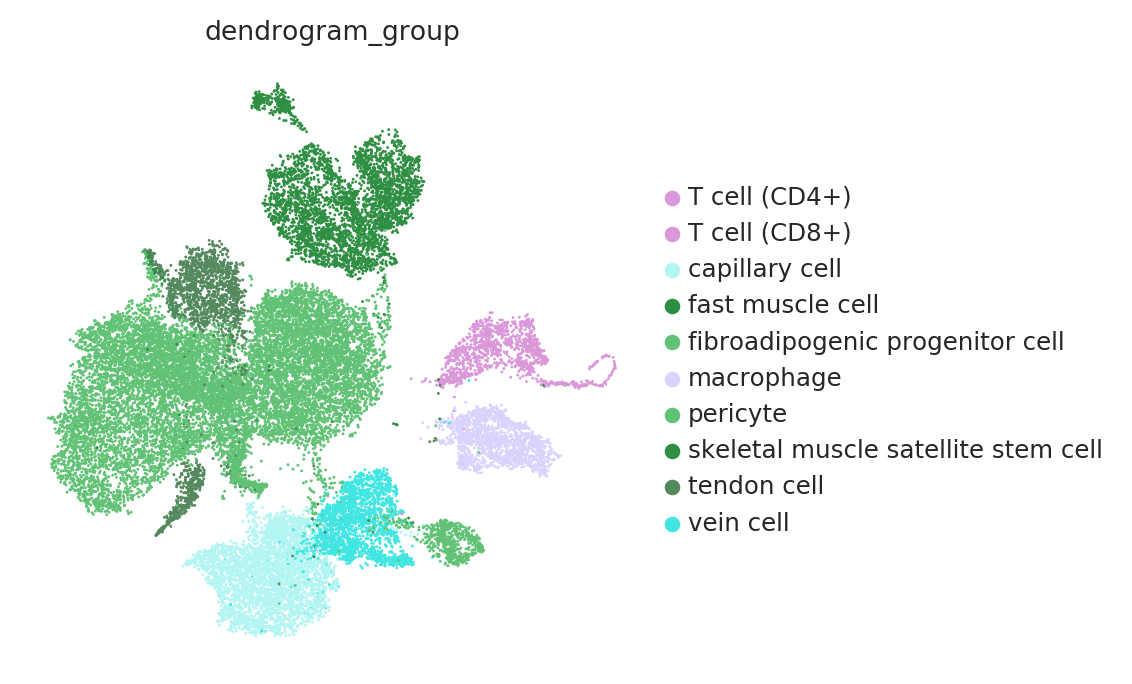

In [43]:
sc.pl.umap(
    adata,
    color="dendrogram_group",
    save="__narrow_group_dendrogram",
)

In [44]:
key_color_cols = {
    "dendrogram_group_name": "dendrogram_group_color_hex",
    "dendrogram_subgroup_name": "dendrogram_subgroup_color_hex",
}

In [45]:
overlapping_columns = narrow_group_to_dendrogram_info.columns.intersection(
    adata.obs.columns
)
if len(overlapping_columns) == 0:
    adata.obs = adata.obs.join(narrow_group_to_dendrogram_info, on="narrow_group")

for key, color_col in key_color_cols.items():
    sorted_colors = pd.Series(
        adata.obs[[key, color_col]].set_index(key)[color_col].to_dict()
    ).sort_values()
    adata.uns[f"{key}_colors"] = sorted_colors.values.tolist()
#         adata.uns['dendrogram_group_name_colors'] = adata.obs['dendrogram_group_color_hex']
#         adata.uns['dendrogram_subgroup_name_colors'] = adata.obs['dendrogram_subgroup_color_hex']

In [46]:
adata

AnnData object with n_obs × n_vars = 28178 × 12906
    obs: 'age', 'cell_id', 'cell_ontology_class', 'cell_ontology_id', 'free_annotation', 'n_genes', 'sex', 'subtissue', 'tissue', 'species', 'species_latin', 'channel', 'sequencing_run', 'cell_barcode', 'n_counts', 'individual', 'narrow_group', 'broad_group', 'compartment_group', 'cell', 'method', 'mouse.id', 'tissue_free_annotation', 'louvain', 'leiden', 'TMS_muscle_ADM_free_annotation', 'TMS_muscle_CE_compartment', 'TMS_muscle_CE_free_annotation', 'batch', 'compartment', 'channel_10x', 'species_batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'compartment_broad', 'compartment_narrow', 'compartment_broad_narrow', 'compartment_species', 'compartment_narrow_species', 'log_counts', 'sqrt_counts', 'dendrogram_group', 'dendrogram_group_name', 'dendrogram_group_color_name', '

## Write output adata to file

In [47]:
# # Write BBKNN + UMAP data to file
adata.write(output_file)

... storing 'dendrogram_group_name' as categorical
... storing 'dendrogram_group_color_name' as categorical
... storing 'dendrogram_group_color_hex' as categorical
... storing 'dendrogram_subgroup_name' as categorical
... storing 'dendrogram_subgroup_color_hex' as categorical
... storing 'lemur_name' as categorical
... storing 'lemur_renamed' as categorical
... storing 'cell_id_lemur_renamed' as categorical


In [48]:
output_file

'/home/olga/data_lg/data_sm_copy/tabula-microcebus/data-objects/cross-species/concatenated__human-lemur-mouse_10x__one2one_orthologs__muscle__august2021__preprocessed.h5ad'

## Write narrow group names for correlation Makefile

In [72]:
preprocess.print_celltypes_for_makefile(adata)

T\\cell\\-openparen-CD4+-closedparen- T\\cell\\-openparen-CD8+-closedparen- capillary\\cell fast\\muscle\\cell fibroadipogenic\\progenitor\\cell macrophage pericyte skeletal\\muscle\\satellite\\stem\\cell tendon\\cell vein\\cell


In [69]:
" ".join(
    [
        x.replace(" ", "\\").replace("(", "-openparen-").replace(")", "-closedparen-")
        for x in sorted(set(adata.obs["narrow_group"]))
    ]
)co

'T\\cell\\-openparen-CD4+-closedparen- T\\cell\\-openparen-CD8+-closedparen- capillary\\cell fast\\muscle\\cell fibroadipogenic\\progenitor\\cell macrophage pericyte skeletal\\muscle\\satellite\\stem\\cell tendon\\cell vein\\cell'

# Plot correlations

## Append path to import

In [50]:
sys.path.append('/home/olga/code/xspecies--olgabot/refactor-bladder-blood-lung-muscle/')

import visualize_correlation as corr_viz

Matplotlib Backend: module://ipykernel.pylab.backend_inline


## Read YAML config

### make dictionary to copy for config

In [51]:
{
    x: list(y)
    for x, y in adata.obs.groupby(["compartment_group"])
    .narrow_group.unique()
    .to_dict()
    .items()
}

{'endothelial': ['capillary cell', 'vein cell'],
 'lymphoid': ['T cell (CD8+)', 'T cell (CD4+)'],
 'myeloid': ['macrophage'],
 'stromal': ['tendon cell',
  'fibroadipogenic progenitor cell',
  'skeletal muscle satellite stem cell',
  'fast muscle cell',
  'pericyte']}

In [60]:
sorted(adata.obs.compartment_group.unique())

['endothelial', 'lymphoid', 'myeloid', 'stromal']

Copy the above into `compartment_narrow` below:

Formatted on https://onlineyamltools.com/prettify-yaml

In [61]:
%%file muscle_config.yml

all_groups:
  compartment:
    - endothelial
    - lymphoid
    - myeloid
    - stromal
  narrow:
    - T cell (CD4+)
    - T cell (CD8+)
    - capillary cell
    - fast muscle cell
    - fibroadipogenic progenitor cell
    - macrophage
    - pericyte
    - skeletal muscle satellite stem cell
    - tendon cell
    - vein cell
  broad:
    - T cell
    - capillary cell
    - fast muscle cell
    - fibroadipogenic progenitor cell
    - macrophage
    - pericyte
    - skeletal muscle satellite stem cell
    - tendon cell
    - vein cell
compartment_narrow:
  endothelial:
    - capillary cell
    - vein cell
  lymphoid:
    - T cell (CD8+)
    - T cell (CD4+)
  myeloid:
    - macrophage
  stromal:
    - tendon cell
    - fibroadipogenic progenitor cell
    - skeletal muscle satellite stem cell
    - fast muscle cell
    - pericyte



Overwriting muscle_config.yml


In [96]:
config_yaml_path = 'muscle_config.yml'


with open(config_yaml_path) as file:
    config = yaml.full_load(file)
    
groups = config["all_groups"].keys()
groups

dict_keys(['compartment', 'narrow', 'broad'])

## Read dataframes

In [112]:
correl_dir = (
    "/home/olga/data_lg/data_sm_copy/tabula-microcebus/analyses/xi-correlation/muscle"
)
within_celltypes_filenames = glob.glob(
    os.path.join(correl_dir, "xi__narrow_group__drop_if_either_zero*.parquet")
)

dfs_within = defaultdict(list)
for filename in within_celltypes_filenames:
    for group in groups:
        if group in filename:
            df = pd.read_parquet(filename)
            df = df.rename(columns={group + "_group": "cell_ontology_class"})
            dfs_within[group].append(df)
for group in dfs_within:        
    print(f'{group}, len: {len(dfs_within[group])}')

len(dfs_within)

narrow, len: 10
broad, len: 1


2

In [113]:
len(within_celltypes_filenames)

10

In [114]:
print('\n'.join(sorted(map(os.path.basename, within_celltypes_filenames))))

xi__narrow_group__drop_if_either_zero_capillary_cell.parquet
xi__narrow_group__drop_if_either_zero_fast_muscle_cell.parquet
xi__narrow_group__drop_if_either_zero_fibroadipogenic_progenitor_cell.parquet
xi__narrow_group__drop_if_either_zero_macrophage.parquet
xi__narrow_group__drop_if_either_zero_pericyte.parquet
xi__narrow_group__drop_if_either_zero_skeletal_muscle_satellite_stem_cell.parquet
xi__narrow_group__drop_if_either_zero_t_cell_(cd4+).parquet
xi__narrow_group__drop_if_either_zero_t_cell_(cd8+).parquet
xi__narrow_group__drop_if_either_zero_tendon_cell.parquet
xi__narrow_group__drop_if_either_zero_vein_cell.parquet


## Write parquet --> csv for backups

In [115]:
for filename in within_celltypes_filenames:
    print(os.path.basename(filename))
    csv = filename.replace('.parquet', '.csv')
    print('--- Reading parquet ... ---')
    %time df = pd.read_parquet(filename)
    print('--- Writing csv ... ---')
    %time df.to_csv(csv)

xi__narrow_group__drop_if_either_zero_vein_cell.parquet
--- Reading parquet ... ---
CPU times: user 23.4 ms, sys: 0 ns, total: 23.4 ms
Wall time: 15.2 ms
--- Writing csv ... ---
CPU times: user 51.3 ms, sys: 2.02 ms, total: 53.3 ms
Wall time: 145 ms
xi__narrow_group__drop_if_either_zero_pericyte.parquet
--- Reading parquet ... ---
CPU times: user 15.1 ms, sys: 6.97 ms, total: 22.1 ms
Wall time: 14.6 ms
--- Writing csv ... ---
CPU times: user 55 ms, sys: 0 ns, total: 55 ms
Wall time: 161 ms
xi__narrow_group__drop_if_either_zero_macrophage.parquet
--- Reading parquet ... ---
CPU times: user 14.2 ms, sys: 6.06 ms, total: 20.2 ms
Wall time: 14.5 ms
--- Writing csv ... ---
CPU times: user 52.5 ms, sys: 814 µs, total: 53.3 ms
Wall time: 131 ms
xi__narrow_group__drop_if_either_zero_capillary_cell.parquet
--- Reading parquet ... ---
CPU times: user 21.7 ms, sys: 1.66 ms, total: 23.3 ms
Wall time: 16.5 ms
--- Writing csv ... ---
CPU times: user 71.5 ms, sys: 7.25 ms, total: 78.8 ms
Wall time: 1

In [116]:
ls /home/olga/data_lg/data_sm_copy/tabula-microcebus/analyses/xi-correlation/muscle

 xi__narrow_group__drop_if_either_zero_capillary_cell.csv
 xi__narrow_group__drop_if_either_zero_capillary_cell.parquet
 xi__narrow_group__drop_if_either_zero_fast_muscle_cell.csv
 xi__narrow_group__drop_if_either_zero_fast_muscle_cell.parquet
 xi__narrow_group__drop_if_either_zero_fibroadipogenic_progenitor_cell.csv
 xi__narrow_group__drop_if_either_zero_fibroadipogenic_progenitor_cell.parquet
 xi__narrow_group__drop_if_either_zero_macrophage.csv
 xi__narrow_group__drop_if_either_zero_macrophage.parquet
 xi__narrow_group__drop_if_either_zero_pericyte.csv
 xi__narrow_group__drop_if_either_zero_pericyte.parquet
 xi__narrow_group__drop_if_either_zero_skeletal_muscle_satellite_stem_cell.csv
 xi__narrow_group__drop_if_either_zero_skeletal_muscle_satellite_stem_cell.parquet
'xi__narrow_group__drop_if_either_zero_t_cell_(cd4+).csv'
'xi__narrow_group__drop_if_either_zero_t_cell_(cd4+).parquet'
'xi__narrow_group__drop_if_either_zero_t_cell_(cd8+).csv'
'xi__narrow_group__drop_if_either_zero_t_c

## Visualize correlation

### Set output folder

In [117]:
output_folder = '/home/olga/googledrive/TabulaMicrocebus/analysis/cross-species--bladder-blood-lung-muscle/muscle/correlation'
! mkdir -p $output_folder

In [118]:
config

{'all_groups': {'compartment': ['endothelial',
   'lymphoid',
   'myeloid',
   'stromal'],
  'narrow': ['T cell (CD4+)',
   'T cell (CD8+)',
   'capillary cell',
   'fast muscle cell',
   'fibroadipogenic progenitor cell',
   'macrophage',
   'pericyte',
   'skeletal muscle satellite stem cell',
   'tendon cell',
   'vein cell'],
  'broad': ['T cell',
   'capillary cell',
   'fast muscle cell',
   'fibroadipogenic progenitor cell',
   'macrophage',
   'pericyte',
   'skeletal muscle satellite stem cell',
   'tendon cell',
   'vein cell']},
 'compartment_narrow': {'endothelial': ['capillary cell', 'vein cell'],
  'lymphoid': ['T cell (CD8+)', 'T cell (CD4+)'],
  'myeloid': ['macrophage'],
  'stromal': ['tendon cell',
   'fibroadipogenic progenitor cell',
   'skeletal muscle satellite stem cell',
   'fast muscle cell',
   'pericyte']}}

key: all_groups
key: compartment_narrow
species2                                   Mouse  Mouse Lemur
species1 cell_ontology_class iteration                       
Human    T cell (CD4+)       0          0.341273     0.362066
                             1          0.321480     0.468884
                             2          0.385566     0.579253
                             3          0.454182     0.542051
                             4          0.374411     0.550210
--- means: ---
compartment_narrow,"xi(Human, mouse) - xi(Human, lemur)"
endothelial: capillary cell,0.003128671507966083
endothelial: vein cell,-0.03649300470824593
lymphoid: T cell (CD4+),-0.0604553648832954
lymphoid: T cell (CD8+),-0.05155432834044939
myeloid: macrophage,-0.007203035509702703
stromal: fast muscle cell,-0.0442635865087812
stromal: fibroadipogenic progenitor cell,-0.09650584937495667
stromal: pericyte,-0.016626575800874257
stromal: skeletal muscle satellite stem cell,-0.05240174272410862
stromal: tendon 

/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing 

species2                                      Human     Mouse
species1    cell_ontology_class iteration                    
Mouse Lemur T cell (CD4+)       0          0.470537  0.475535
                                1          0.432092  0.457574
                                2          0.448812  0.418960
                                3          0.372082  0.413889
                                4          0.361239  0.557802


/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/home/olga/miniconda3/envs/tabula-microcebus-jan2021/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing 

--- means: ---
compartment_narrow,"xi(Mouse Lemur, mouse) - xi(Mouse Lemur, human)"
endothelial: capillary cell,0.0119233193803848
endothelial: vein cell,0.011335860300633023
lymphoid: T cell (CD4+),0.04865925043800245
lymphoid: T cell (CD8+),0.11515723356717729
myeloid: macrophage,0.0786135768727335
stromal: fast muscle cell,-0.03584617848222974
stromal: fibroadipogenic progenitor cell,0.012421618671762618
stromal: pericyte,-0.03181291032933496
stromal: skeletal muscle satellite stem cell,0.029456758059699488
stromal: tendon cell,-0.02931546266932272

--- std dev: ---
compartment_narrow,"xi(Mouse Lemur, mouse) - xi(Mouse Lemur, human)"
endothelial: capillary cell,0.07829641916389371
endothelial: vein cell,0.06863193497478759
lymphoid: T cell (CD4+),0.0858857626138858
lymphoid: T cell (CD8+),0.08687160500591518
myeloid: macrophage,0.07277536913983411
stromal: fast muscle cell,0.08229228211106879
stromal: fibroadipogenic progenitor cell,0.07002606873140957
stromal: pericyte,0.0819550913

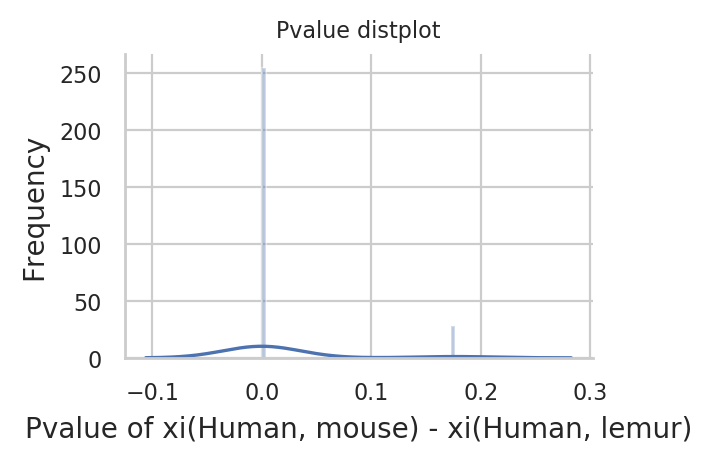

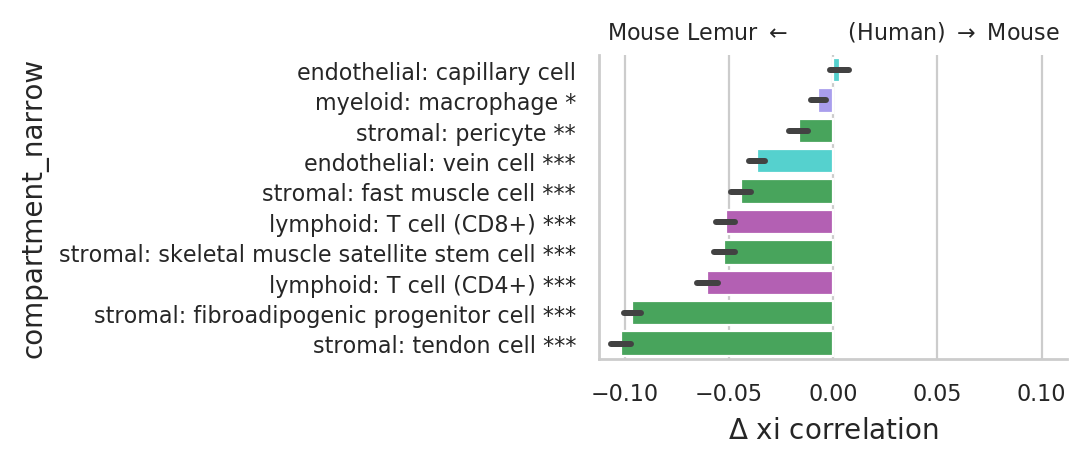

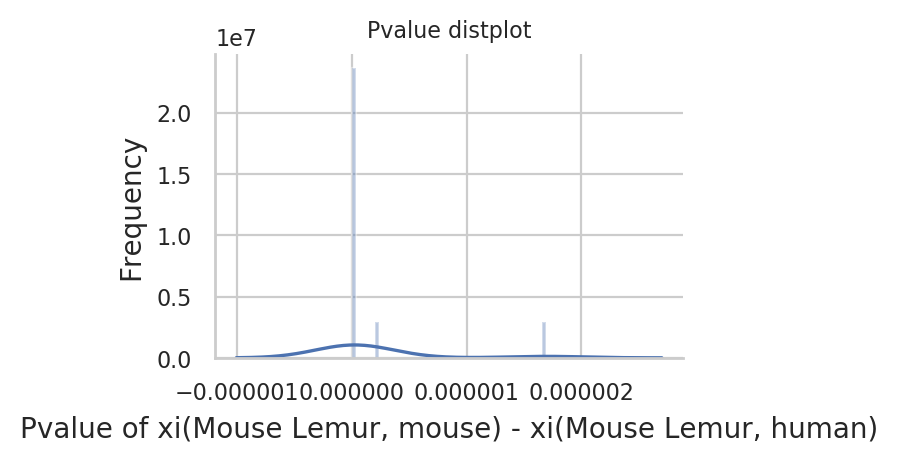

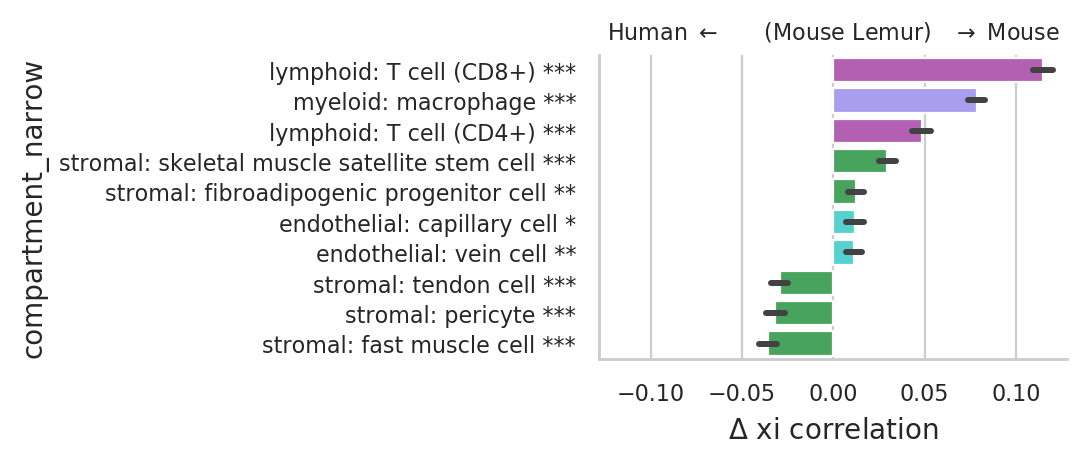

In [119]:
pvalue_level_kws=dict(level3=1e-10, level2=1e-5, level1=1e-3)

for key, dictionary in config.items():
    print(f'key: {key}')
    if "all_groups" == key:
        continue
    if "significant" in key:
        continue
#         df = pd.concat(dfs_within["narrow"], ignore_index=True)
#         narrow_celltypes_significant = []
#         for key, value in config["significant_compartment_narrow"].items():
#             narrow_celltypes_significant.extend(value)
#         df = df[df['cell_ontology_class'].isin(
#             narrow_celltypes_significant)]
    else:
        df = pd.concat(dfs_within["narrow"], ignore_index=True)
    corr_viz.corr_diff_within(df, "Human", dictionary, pvalue_level_kws=pvalue_level_kws)
    corr_viz.corr_diff_within(df, "Mouse Lemur", dictionary, pvalue_level_kws=pvalue_level_kws)

for i in plt.get_fignums():
    fig = plt.figure(i)
#     fig.set_size_inches(4, 5)
    sns.despine(fig=fig)
#     fig.tight_layout()
    fig.set_size_inches(3, 2, forward=True)
    fig.savefig(os.path.join(output_folder, "figure%d.png" % i))
    fig.savefig(os.path.join(output_folder, "figure%d.pdf" % i))

In [103]:
df.groupby(['cell_ontology_class', 'species1', 'species2'])